<a href="https://colab.research.google.com/github/ksBrose/3DSGroup_BootcampDataScience/blob/main/atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto Data Science - Grupo 3DS

Foram baixados primeiramente os arquivos de dados telemétricos das cidades de Encantado, Muçum e Santa Tereza, no período de 01/08/2023 a 31/10/2023.
Para o município de Santa Tereza, foram baixados dados de 2 estações: Santa Tereza e Linha José Julio.

**Sites Referencia**
- https://www.snirh.gov.br/hidroweb/mapa
- https://www.snirh.gov.br/hidrotelemetria/serieHistorica.aspx

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime

## Base de dados de 3 meses

In [85]:
df_Encantado = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86720000-ENCANTADO.csv', encoding='ISO-8859-1', delimiter=';')
df_Mucum = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86510000-MUCUM.csv', encoding='ISO-8859-1', delimiter=';')
df_Sta_Tereza = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86472600-SANTA%20TEREZA.csv', encoding='ISO-8859-1', delimiter=';')
df_Lin_JJ = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86472000-LINHA%20JOSE%20JULIO.csv', encoding='ISO-8859-1', delimiter=';')

In [86]:
df_Encantado['Data_Hora'] = pd.to_datetime(df_Encantado['Data'] + ' ' + df_Encantado['Hora'], format='%d/%m/%Y %H:%M:%S')
df_Encantado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6071 entries, 0 to 6070
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          6071 non-null   object        
 1   Hora          6071 non-null   object        
 2   Chuva (mm)    6071 non-null   object        
 3   Nível (cm)    6071 non-null   object        
 4   Vazão (m3/s)  3709 non-null   object        
 5   Unnamed: 5    0 non-null      float64       
 6   Data_Hora     6071 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 332.1+ KB


In [87]:
df_Encantado.head()

,Data,Hora,Chuva (mm),Nível (cm),Vazão (m3/s),Unnamed: 5,Data_Hora
0,01/08/2023,02:30:00,0,228,251.8,NaN,2023-08-01 02:30:00
1,01/08/2023,02:45:00,0,228,251.8,NaN,2023-08-01 02:45:00
2,01/08/2023,03:00:00,0,228,251.8,NaN,2023-08-01 03:00:00
3,01/08/2023,03:15:00,0,227,248.1,NaN,2023-08-01 03:15:00
4,01/08/2023,03:30:00,0,227,248.1,NaN,2023-08-01 03:30:00


In [88]:
df_Encantado.tail()

,Data,Hora,Chuva (mm),Nível (cm),Vazão (m3/s),Unnamed: 5,Data_Hora
6066,30/10/2023,23:00:00,0,197,146.1,NaN,2023-10-30 23:00:00
6067,30/10/2023,23:15:00,0,197,146.1,NaN,2023-10-30 23:15:00
6068,30/10/2023,23:30:00,0,197,146.1,NaN,2023-10-30 23:30:00
6069,30/10/2023,23:45:00,0,197,146.1,NaN,2023-10-30 23:45:00
6070,31/10/2023,00:00:00,0,197,146.1,NaN,2023-10-31 00:00:00


Text(0, 0.5, 'Nivel')

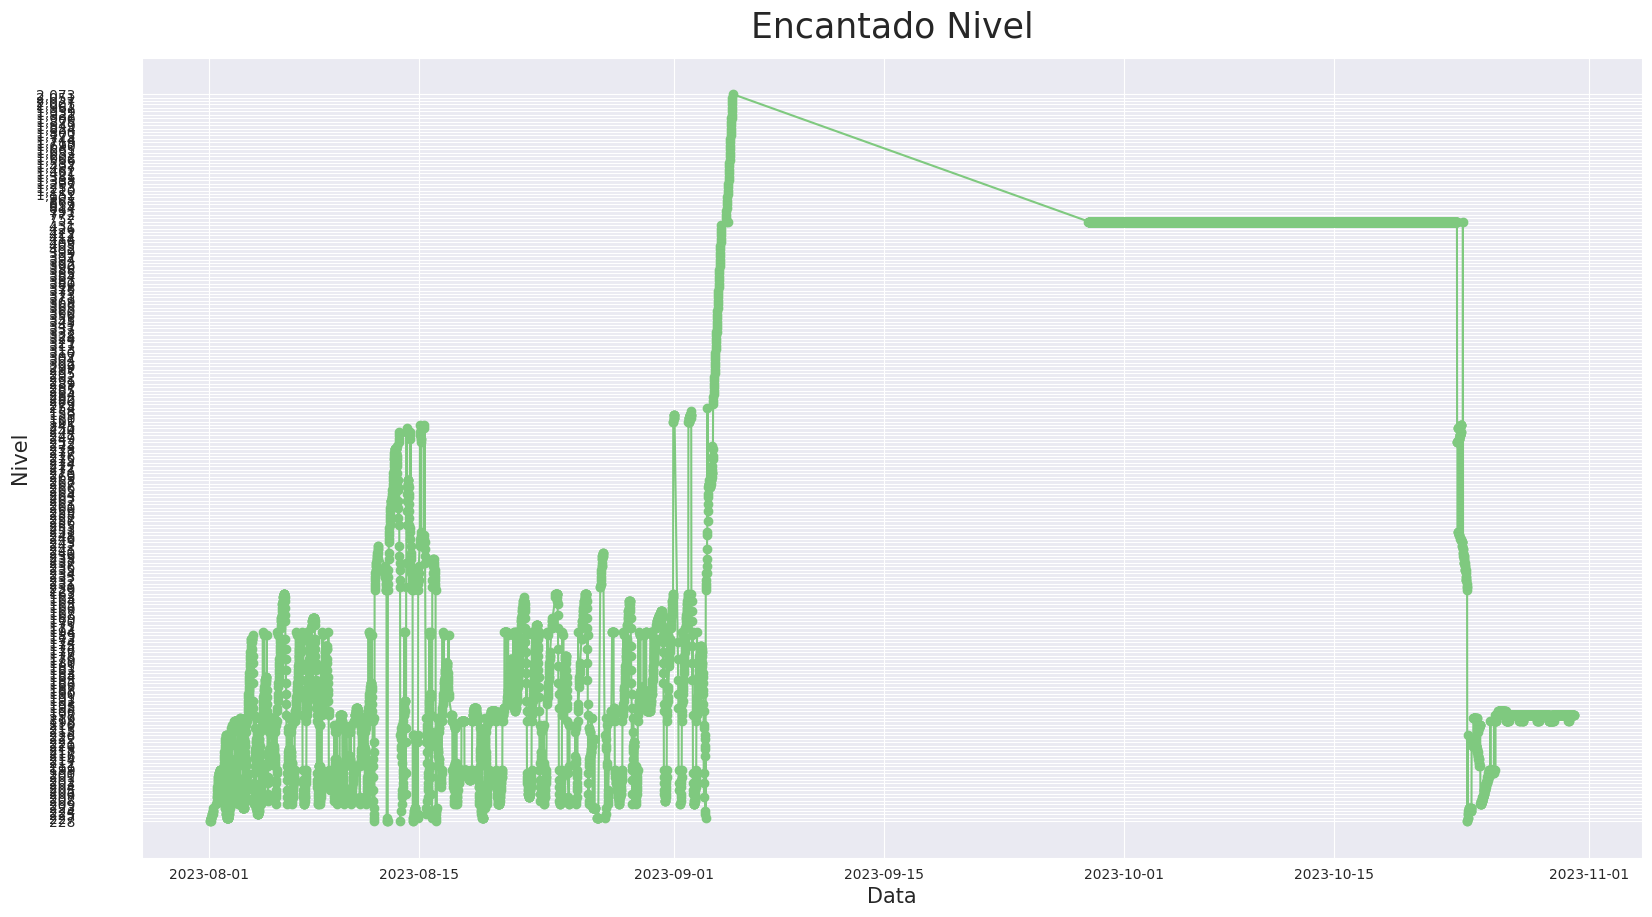

In [89]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

#eixo.scatter(df_Encantado['Data_Hora'], df_Encantado['Nível (cm)'])
eixo.plot(df_Encantado['Data_Hora'], df_Encantado['Nível (cm)'], marker='o', linestyle='-')  # 'o-' combina linha com pontos nas marcações
eixo.set_title('Encantado Nivel', fontsize=25, pad=15)
eixo.set_xlabel('Data', fontsize=15)
eixo.set_ylabel('Nivel', fontsize=15)

## Base de dados de 1 ano

In [90]:
df_Encantado24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86720000-ENCANTADO-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Encantado23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86720000-ENCANTADO-2023-2022.csv', encoding='ISO-8859-1', delimiter=';')
df_Mucum24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86510000-MUCUM-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Mucum23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86510000-MUCUM-2023-2022.csv', encoding='ISO-8859-1', delimiter=';')
df_Sta_Tereza24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472600-SANTA-TEREZA-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Sta_Tereza23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472600-SANTA-TEREZA-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Jose_Julio24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472000-LINHA-JOSE-JULIO-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Jose_Julio23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472000-LINHA-JOSE-JULIO-2023-2022.csv', encoding='ISO-8859-1', delimiter=';')

In [91]:
df_Encantado24 = df_Encantado24.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Encantado23 = df_Encantado23.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Mucum24 = df_Mucum24.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Mucum23 = df_Mucum23.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Sta_Tereza24 = df_Sta_Tereza24.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Sta_Tereza23 = df_Sta_Tereza23.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Jose_Julio24 = df_Jose_Julio24.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Jose_Julio23 = df_Jose_Julio23.drop(['Bateria(V)', 'TempInt(C)'], axis=1)

In [92]:
df_Encantado24.head()

,Data/Hora,Chuva(mm),Nivel(cm),Vazao(m3/s)
0,23/10/2024 15:00,0.0,100.0,0.11
1,23/10/2024 14:45,0.0,100.0,0.11
2,23/10/2024 14:30,0.0,100.0,0.11
3,23/10/2024 14:15,0.0,99.0,NaN
4,23/10/2024 14:00,0.0,99.0,NaN


In [93]:
df_Encantado24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35125 entries, 0 to 35124
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data/Hora    35124 non-null  object 
 1   Chuva(mm)    34991 non-null  float64
 2   Nivel(cm)    25415 non-null  float64
 3   Vazao(m3/s)  26309 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.1+ MB


- Alterar Dtype Data/Hora para variavel datetime

In [94]:
df_Encantado24['Data/Hora'] = pd.to_datetime(df_Encantado24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Encantado23['Data/Hora'] = pd.to_datetime(df_Encantado23['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Mucum24['Data/Hora'] = pd.to_datetime(df_Mucum24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Mucum23['Data/Hora'] = pd.to_datetime(df_Mucum23['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Sta_Tereza24['Data/Hora'] = pd.to_datetime(df_Sta_Tereza24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Sta_Tereza23['Data/Hora'] = pd.to_datetime(df_Sta_Tereza23['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Jose_Julio24['Data/Hora'] = pd.to_datetime(df_Jose_Julio24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Jose_Julio23['Data/Hora'] = pd.to_datetime(df_Jose_Julio23['Data/Hora'], format='%d/%m/%Y %H:%M')

In [95]:
df_Encantado24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35125 entries, 0 to 35124
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    35124 non-null  datetime64[ns]
 1   Chuva(mm)    34991 non-null  float64       
 2   Nivel(cm)    25415 non-null  float64       
 3   Vazao(m3/s)  26309 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.1 MB


In [96]:
print('Quantidade de linhas e colunas:', df_Encantado24.shape)
print('Quantidade de dados nulos:', df_Encantado24.isna().sum().sum())

Quantidade de linhas e colunas: (35125, 4)
Quantidade de dados nulos: 18661


In [97]:
df_Encantado_unico = pd.concat([df_Encantado24, df_Encantado23]).drop_duplicates().reset_index(drop=True)
df_Encantado_unico['Data/Hora'] = pd.to_datetime(df_Encantado_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Mucum_unico = pd.concat([df_Mucum24, df_Mucum23]).drop_duplicates().reset_index(drop=True)
df_Mucum_unico['Data/Hora'] = pd.to_datetime(df_Mucum_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Sta_Tereza_unico = pd.concat([df_Sta_Tereza24, df_Sta_Tereza23]).drop_duplicates().reset_index(drop=True)
df_Sta_Tereza_unico['Data/Hora'] = pd.to_datetime(df_Sta_Tereza_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Jose_Julio_unico = pd.concat([df_Jose_Julio24, df_Jose_Julio23]).drop_duplicates().reset_index(drop=True)
df_Jose_Julio_unico['Data/Hora'] = pd.to_datetime(df_Jose_Julio_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Encantado_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64815 entries, 0 to 64814
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    64814 non-null  datetime64[ns]
 1   Chuva(mm)    62248 non-null  float64       
 2   Nivel(cm)    52718 non-null  float64       
 3   Vazao(m3/s)  53612 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 MB


# Plotando graficos Nivel (ano)




In [98]:
def plotar_matplot(titulo, labelx, labely, x, y, dataset):
  fig = plt.figure(figsize=(15,8))
  eixo = fig.add_axes([0,0,1,1])
  eixo.plot(x, y, data = dataset, marker='o', linestyle='-')  # 'o-' combina linha com pontos nas marcações
  eixo.set_title(titulo, fontsize=25, pad=15)
  eixo.set_xlabel(labelx, fontsize=15)
  eixo.set_ylabel(labely, fontsize=15)
  eixo = eixo

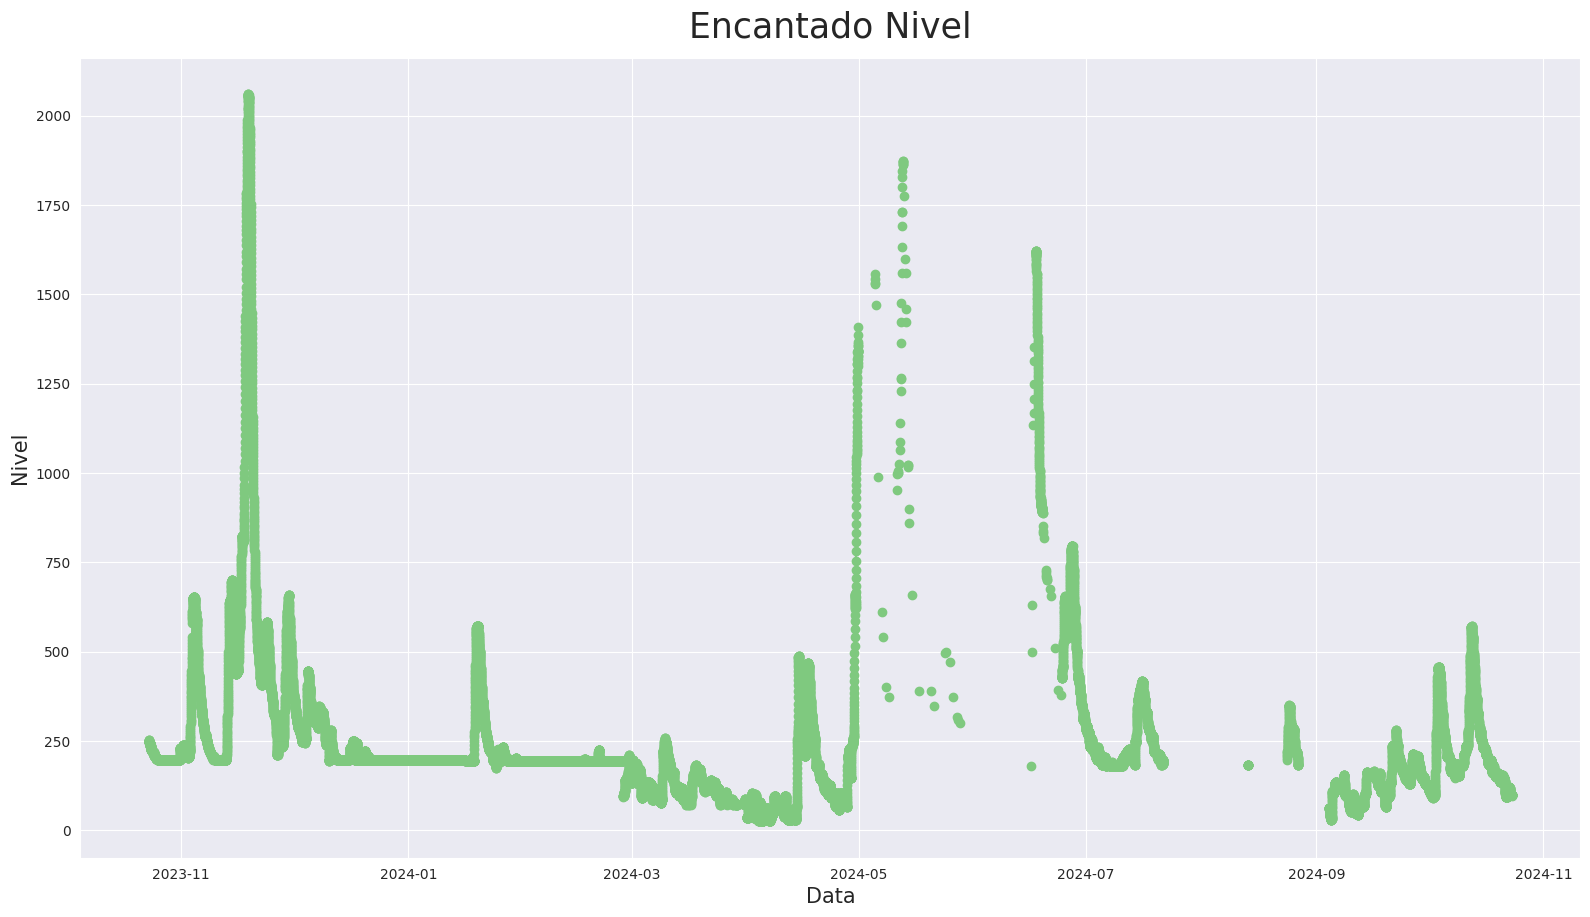

In [99]:
plotar_matplot('Encantado Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado24)

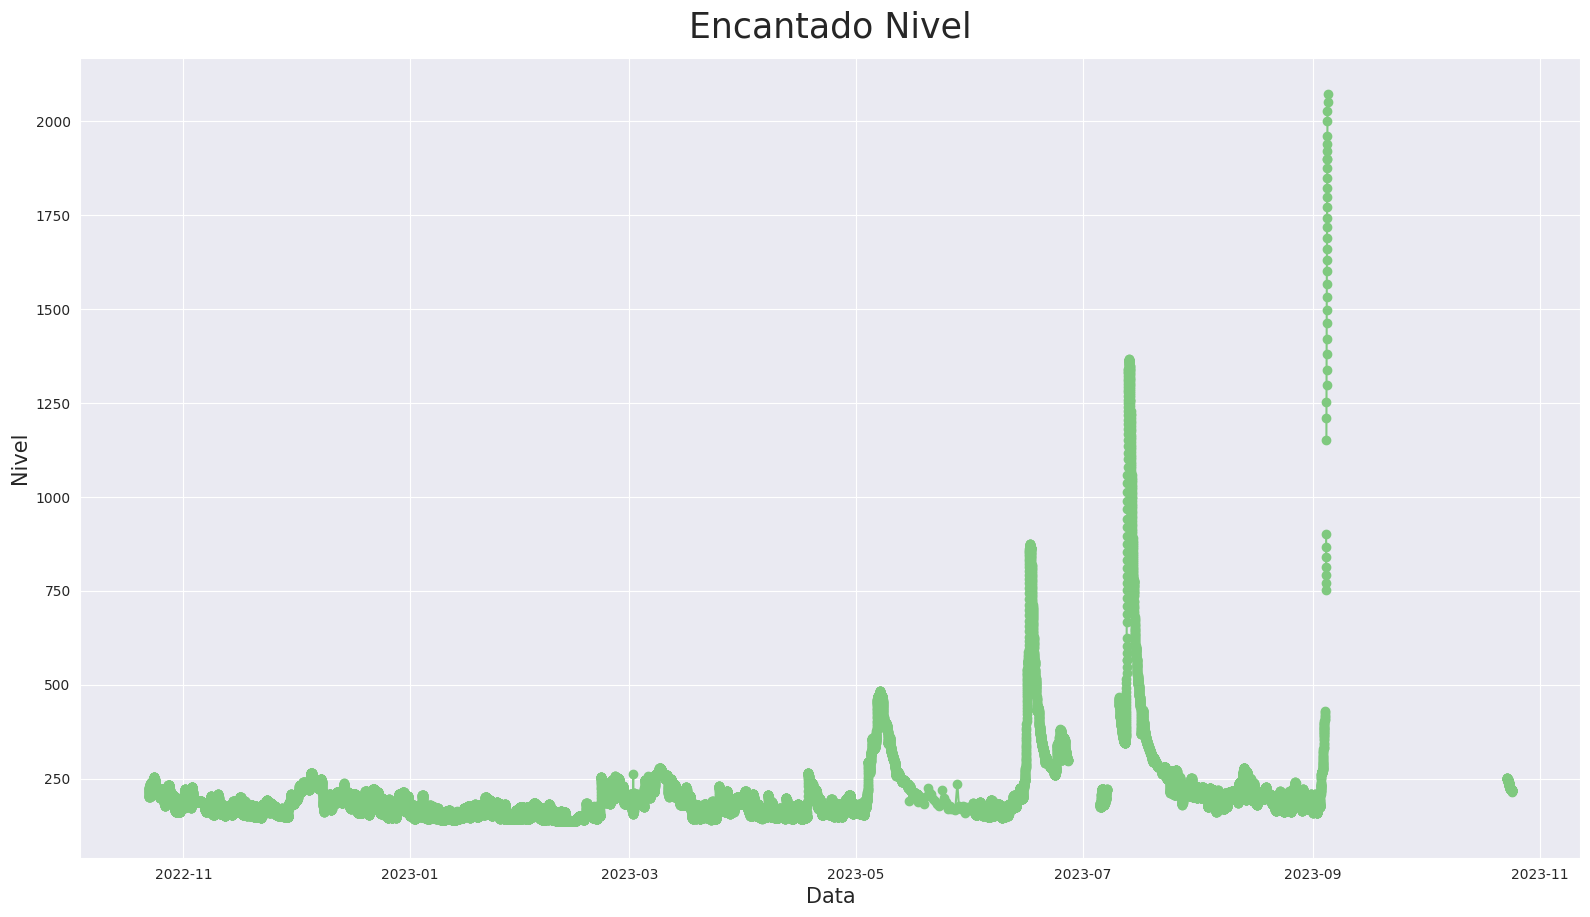

In [100]:
plotar_matplot('Encantado Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado23)

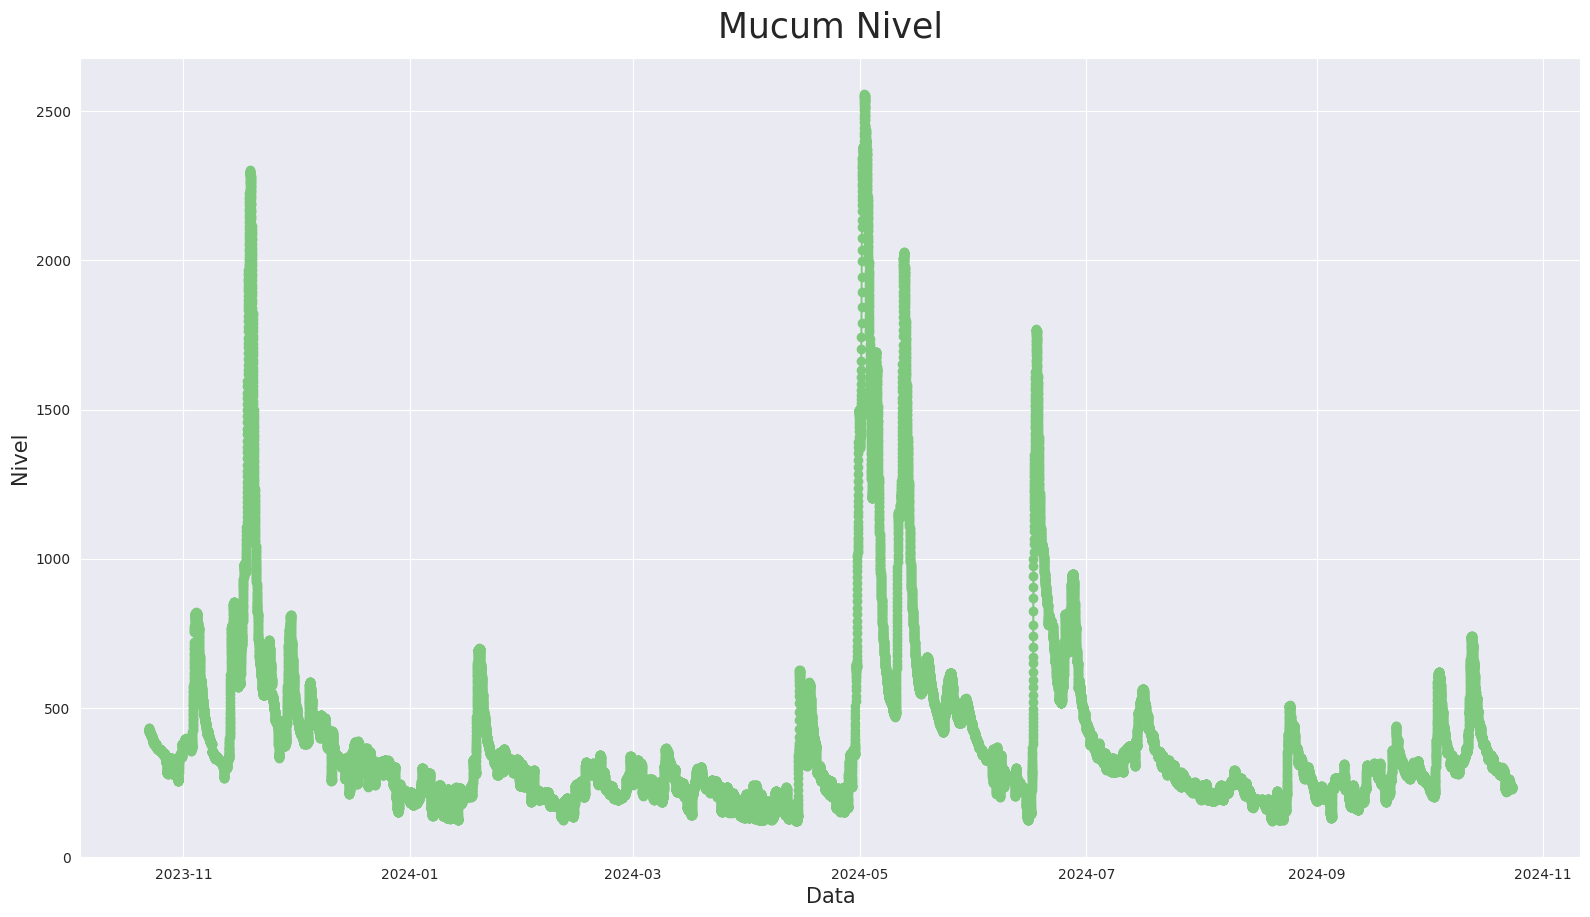

In [101]:
plotar_matplot('Mucum Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Mucum24)

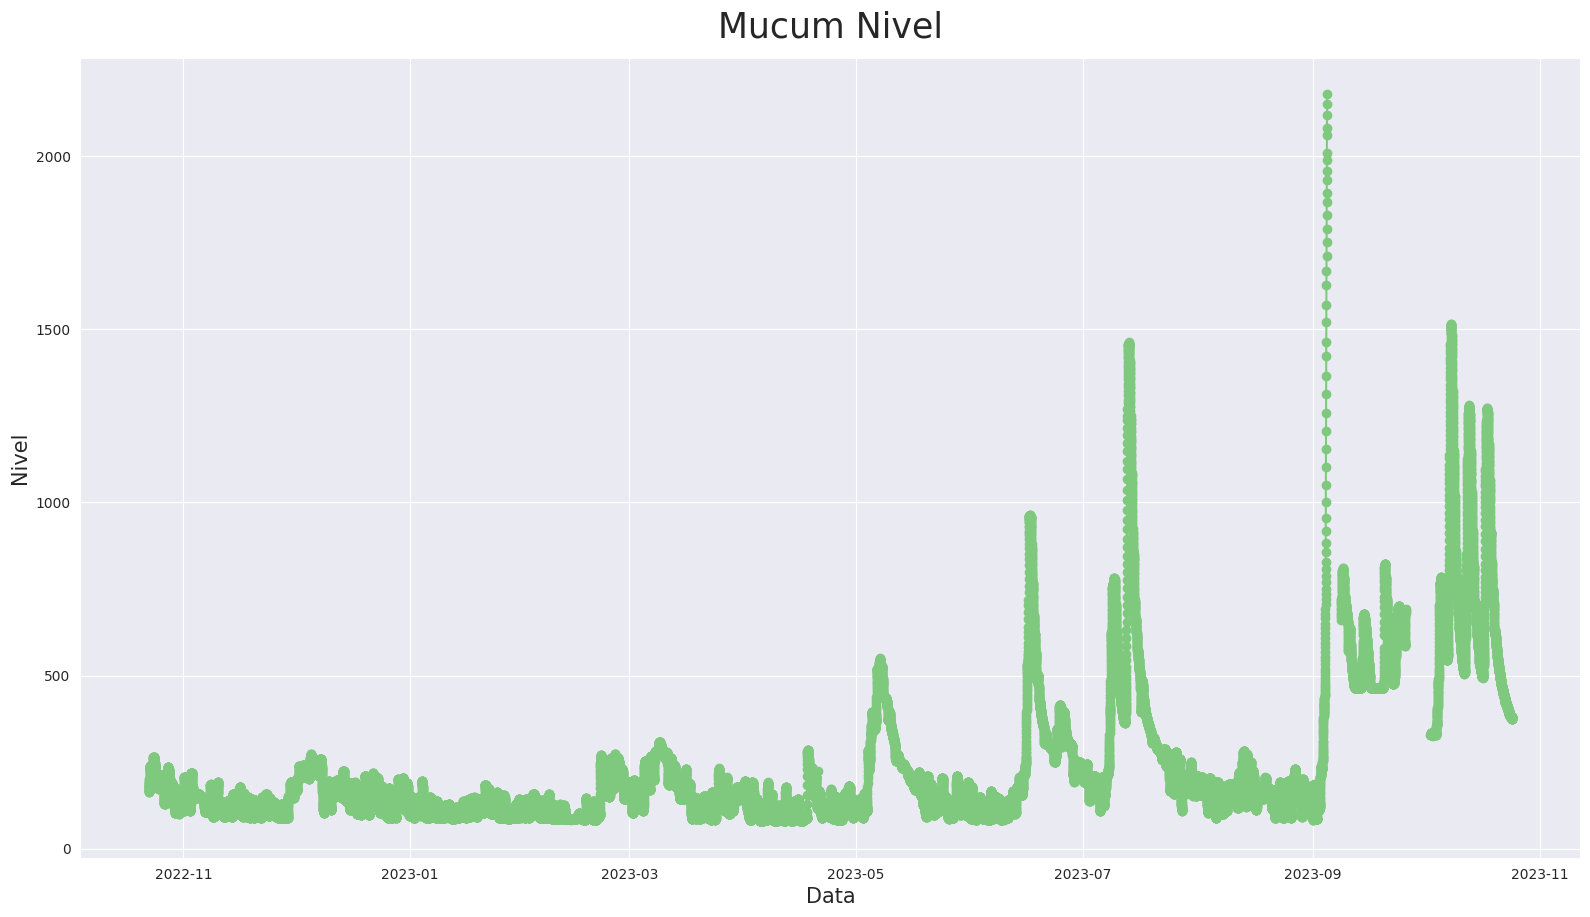

In [102]:
plotar_matplot('Mucum Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Mucum23)

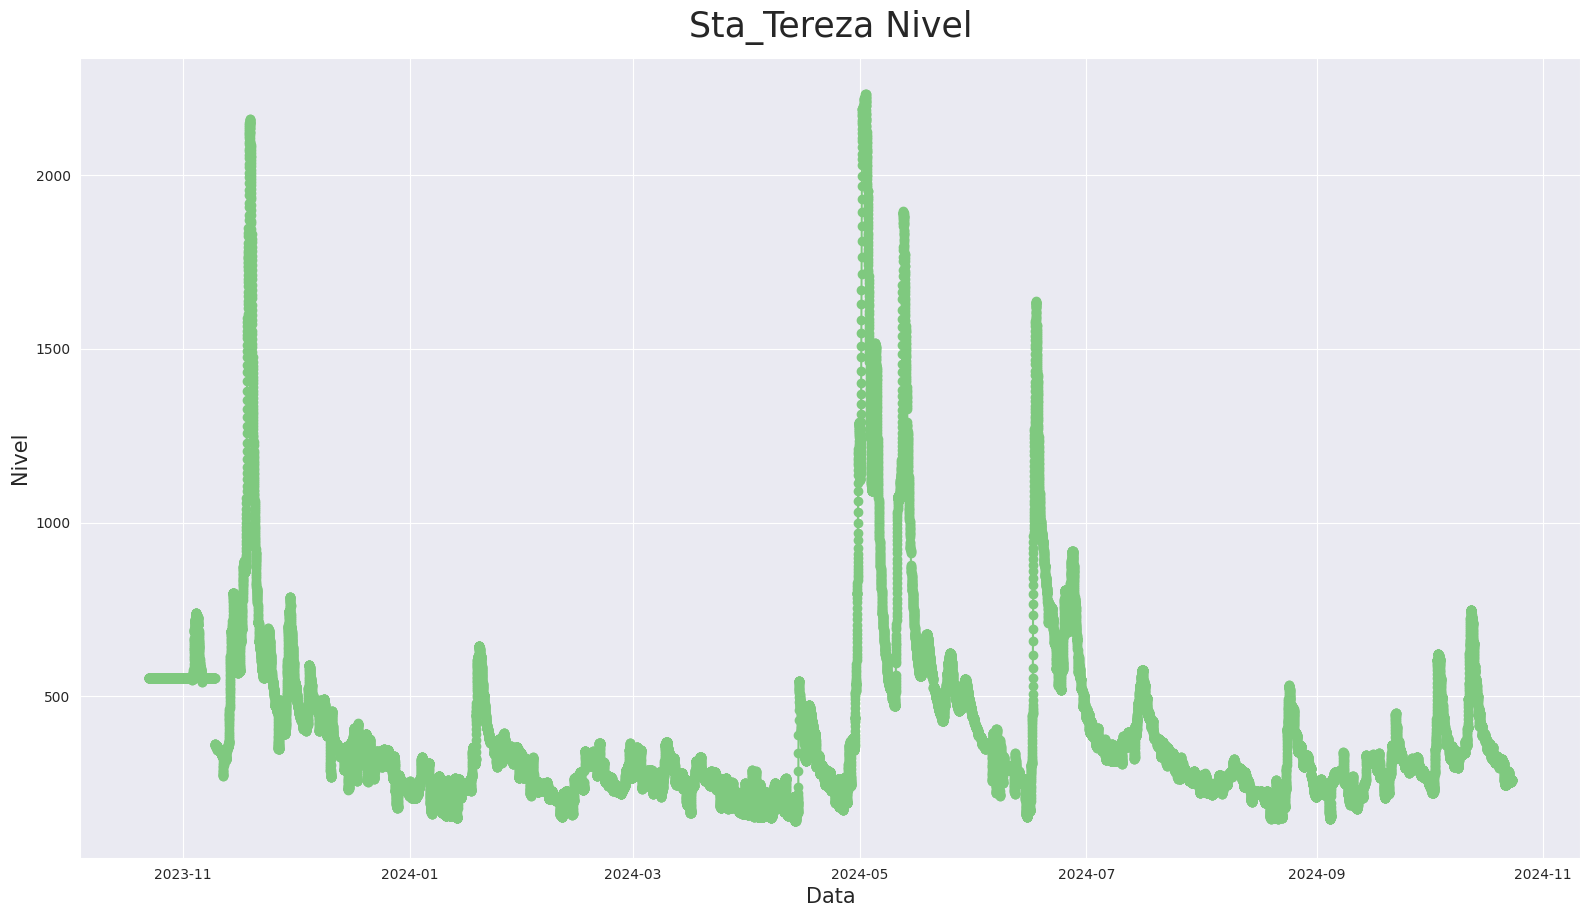

In [103]:
plotar_matplot('Sta_Tereza Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Sta_Tereza24)

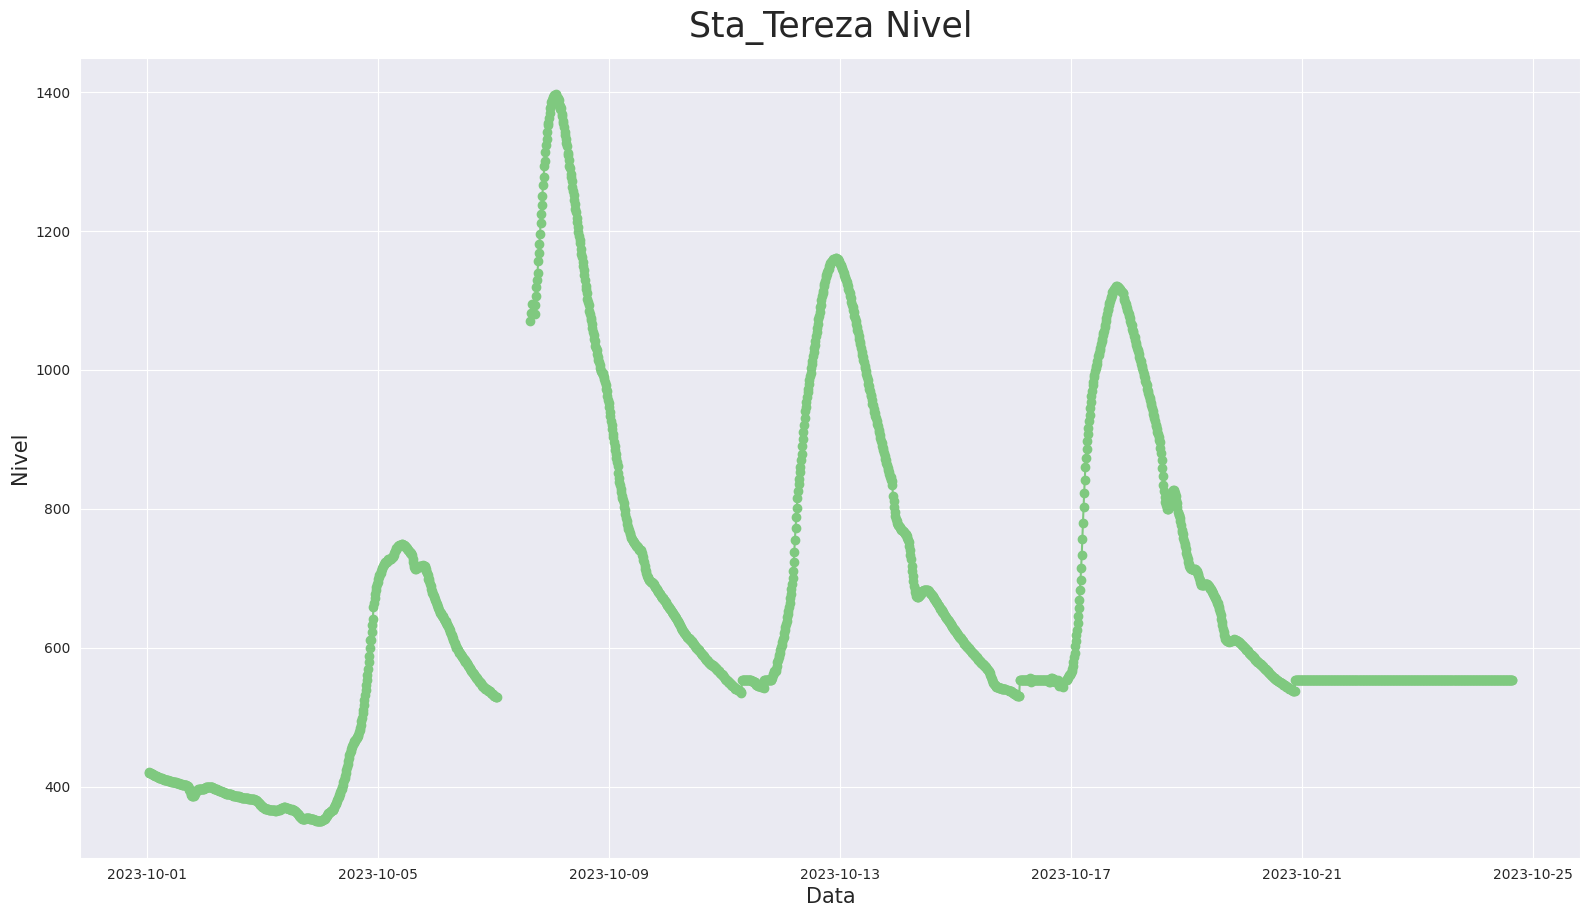

In [104]:
plotar_matplot('Sta_Tereza Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Sta_Tereza23)

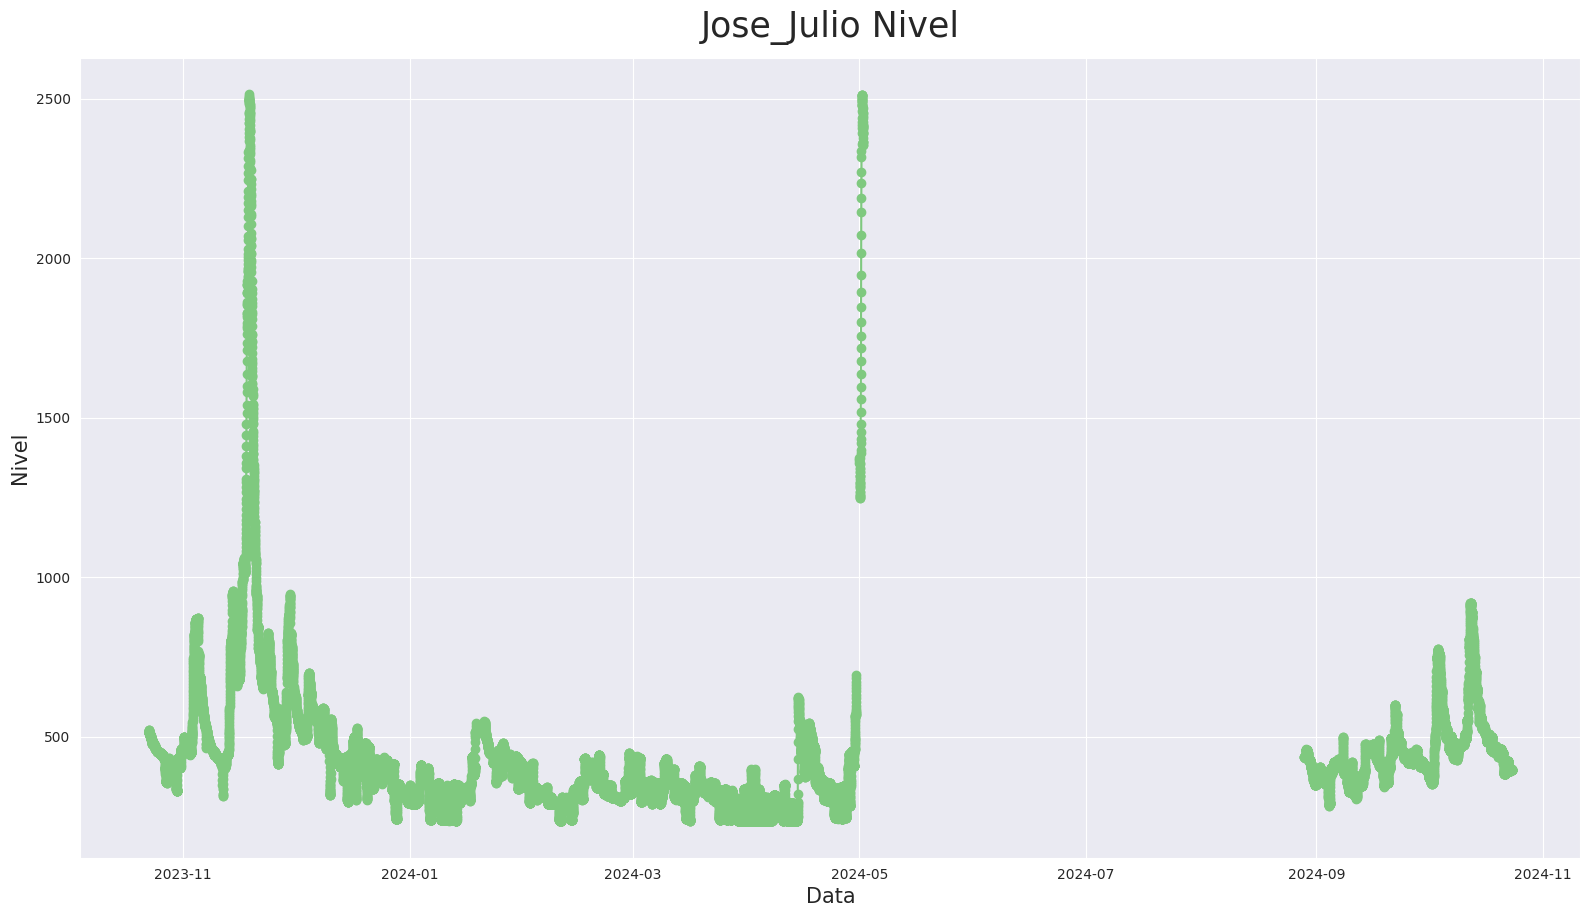

In [105]:
plotar_matplot('Jose_Julio Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Jose_Julio24)

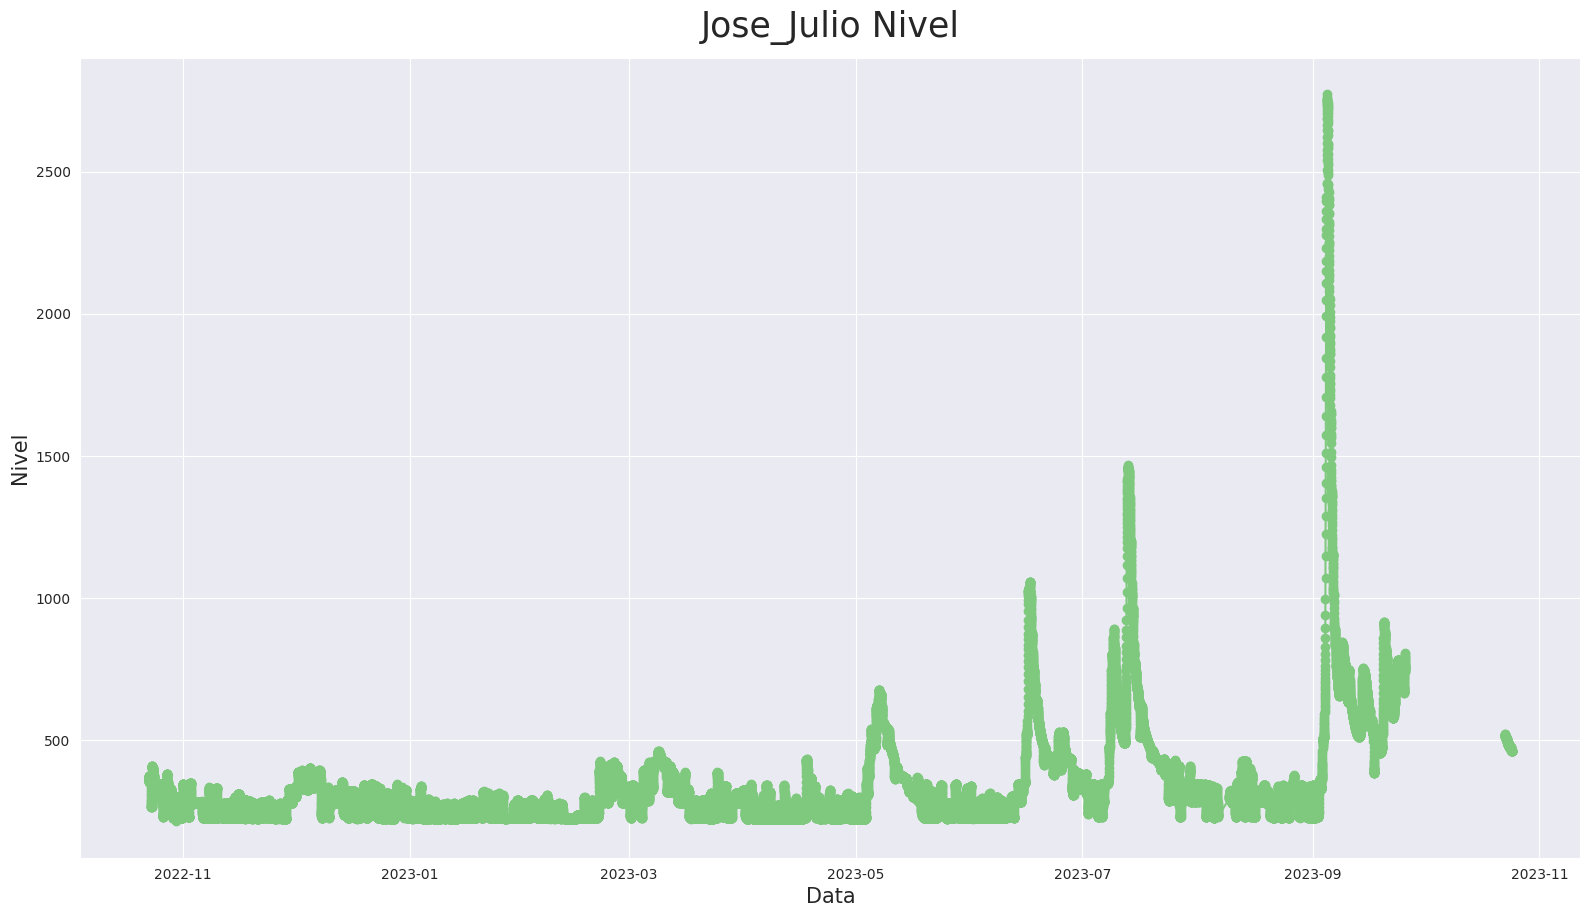

In [106]:
plotar_matplot('Jose_Julio Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Jose_Julio23)

# Boxplot

In [165]:
def plotar_matplot(titulo, labelx, labely, x, y, dataset, tipo='linha'):
    # Verificar se o dataset não está vazio
    if dataset.empty:
        print("O dataset está vazio.")
        return

    # Verificar se as colunas especificadas existem no dataset
    if x not in dataset.columns or y not in dataset.columns:
        print(f"As colunas '{x}' e '{y}' devem existir no dataset.")
        return

    fig = plt.figure(figsize=(15, 8))
    eixo = fig.add_axes([0, 0, 1, 1])

    if tipo == 'linha':
        eixo.plot(dataset[x], dataset[y], marker='o', linestyle='-')  # Gráfico de linha com pontos
    elif tipo == 'boxplot':
        # Remover nulos apenas da coluna y
        dataset_cleaned = dataset.dropna(subset=[y])
        eixo.boxplot(dataset_cleaned[y], vert=True)
        eixo.set_xticklabels([labelx])  # Rótulo do eixo x

    # Configurar título e rótulos dos eixos
    eixo.set_title(titulo, fontsize=25, pad=15)
    eixo.set_xlabel(labelx, fontsize=15)
    eixo.set_ylabel(labely, fontsize=15)

    plt.show()


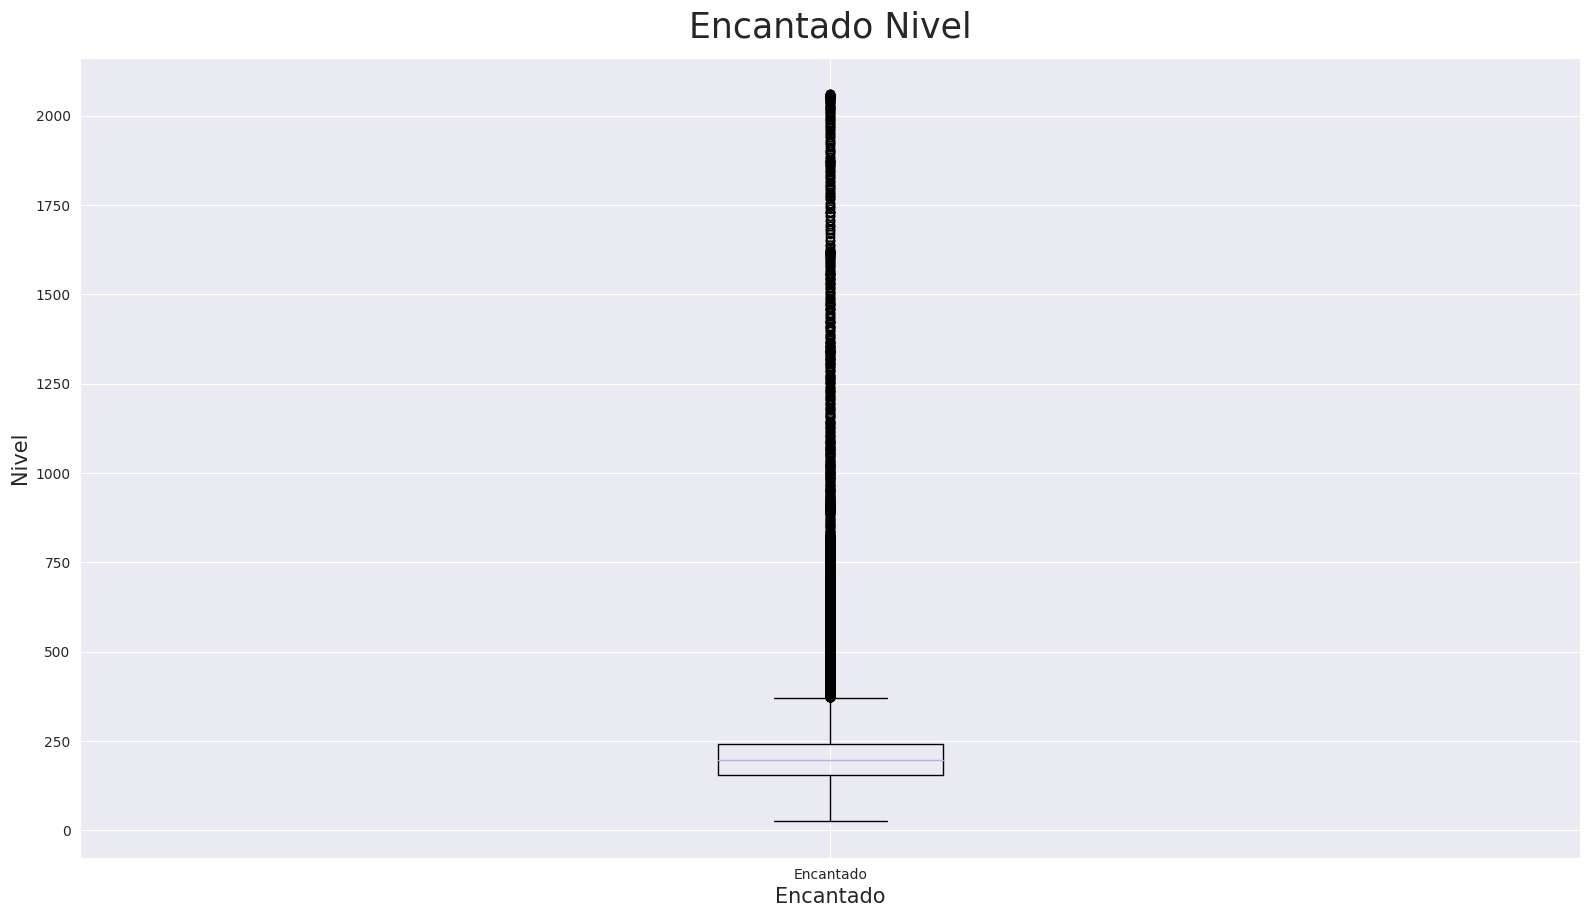

In [170]:
plotar_matplot('Encantado Nivel', 'Encantado', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado24, tipo='boxplot')

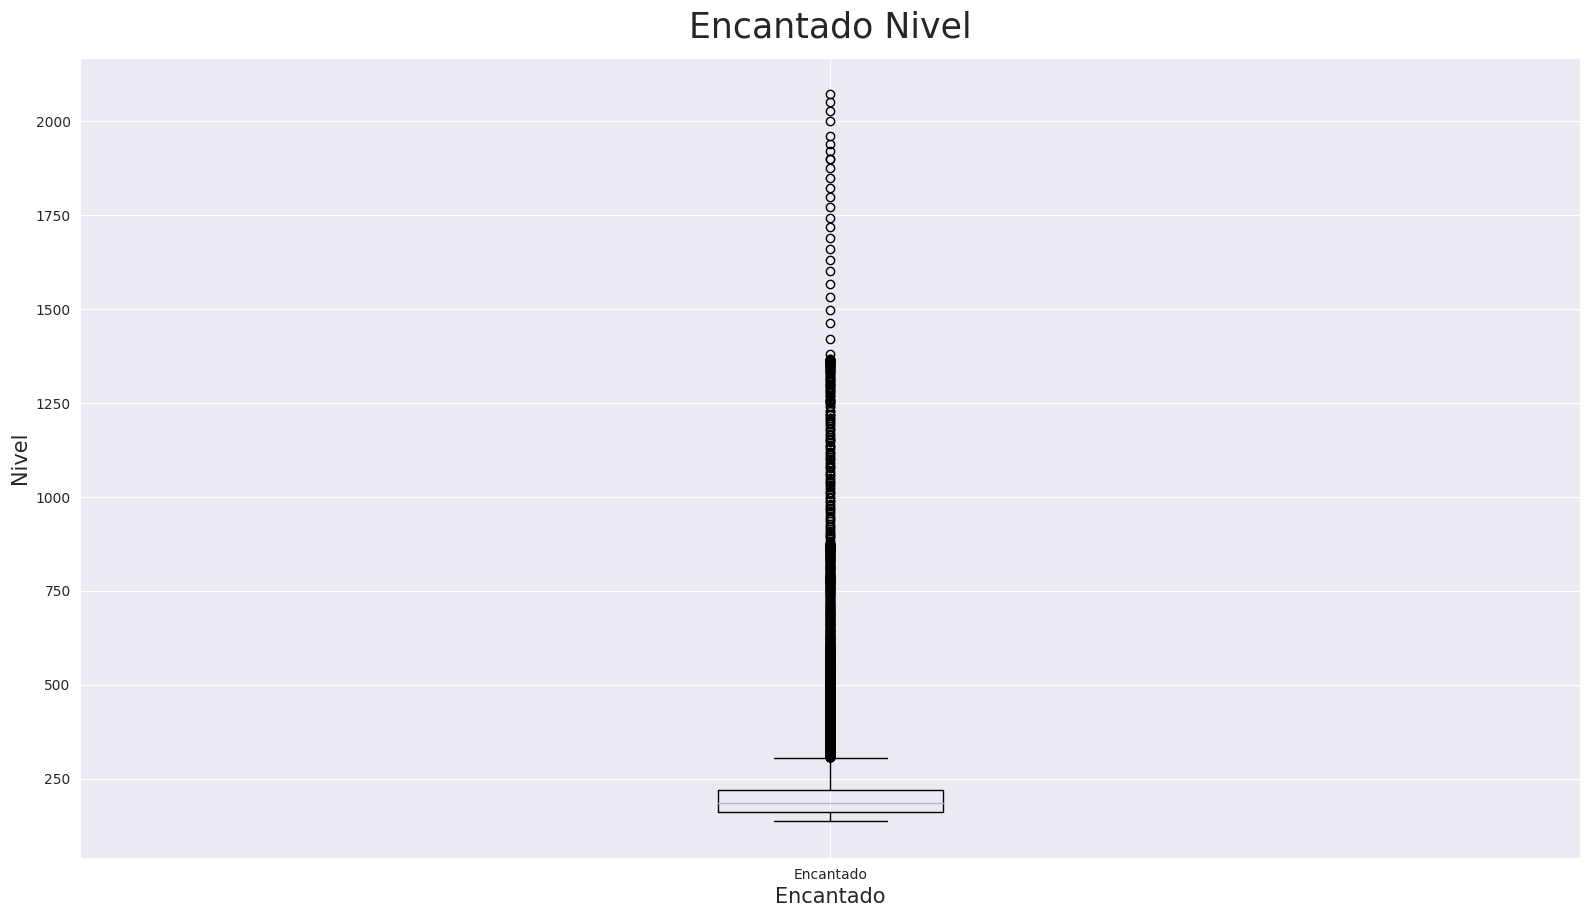

In [171]:
plotar_matplot('Encantado Nivel', 'Encantado', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado23, tipo='boxplot')

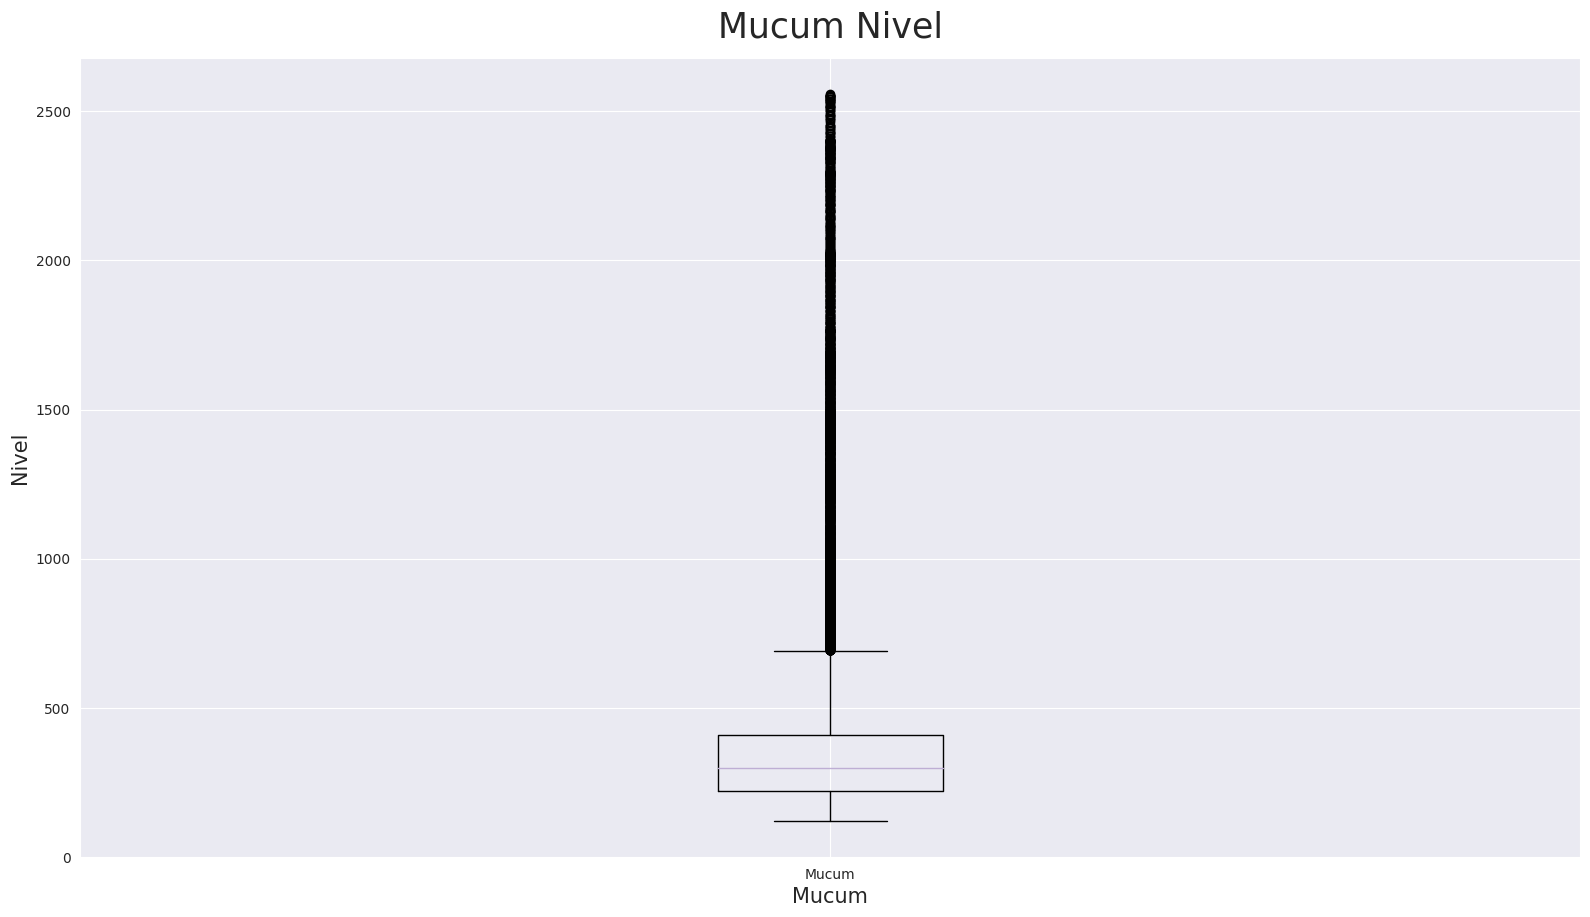

In [173]:
plotar_matplot('Mucum Nivel', 'Mucum', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Mucum24, tipo='boxplot')

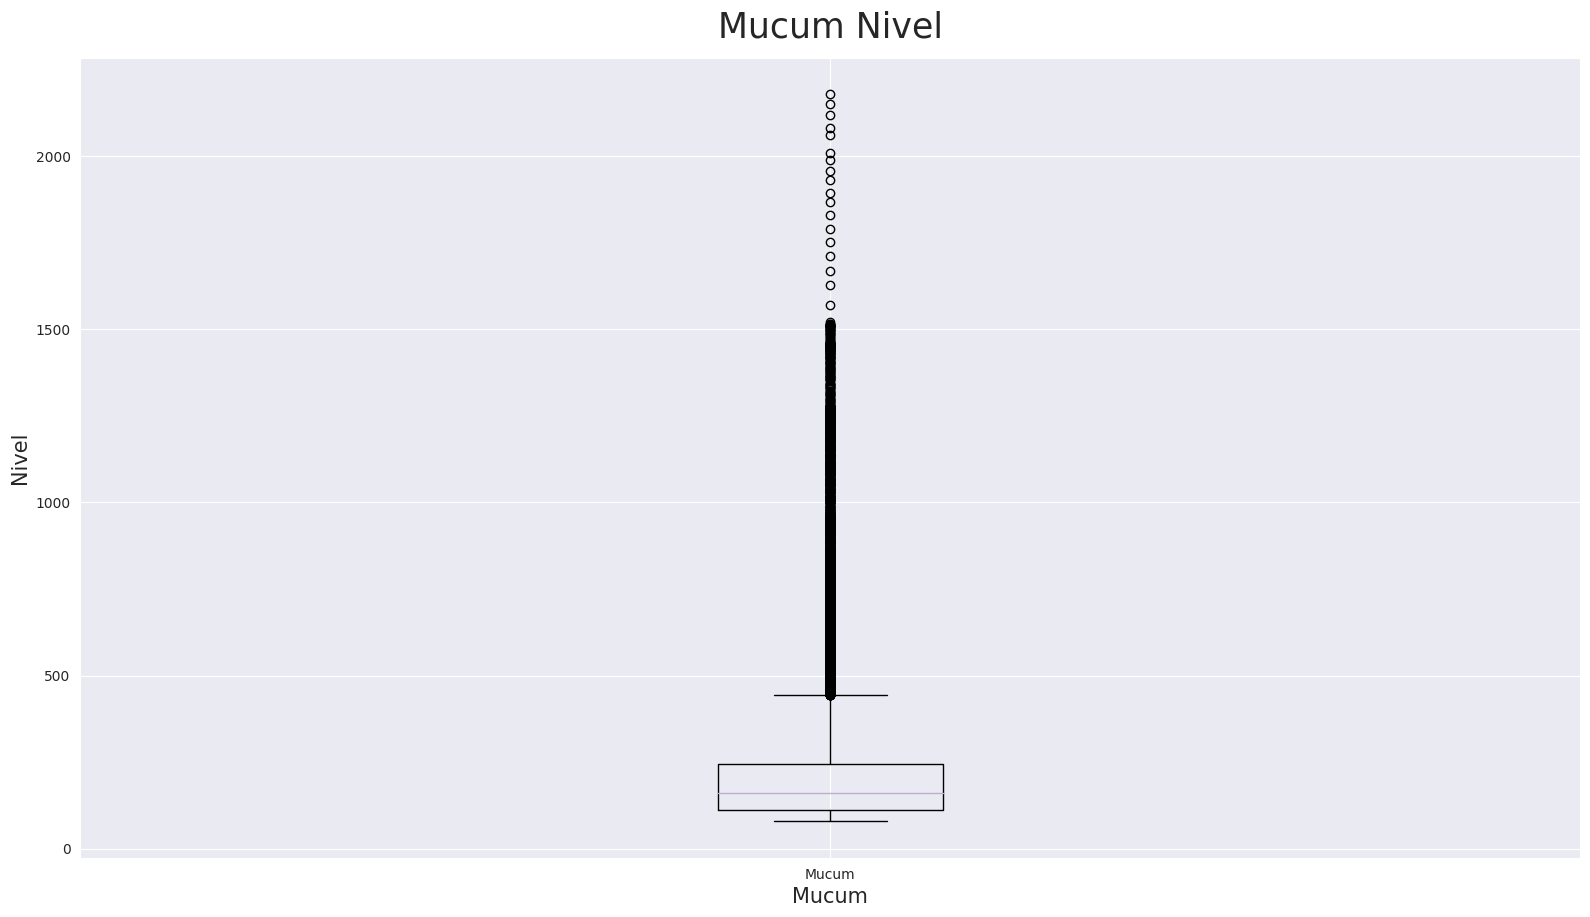

In [174]:
plotar_matplot('Mucum Nivel', 'Mucum', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Mucum23, tipo='boxplot')

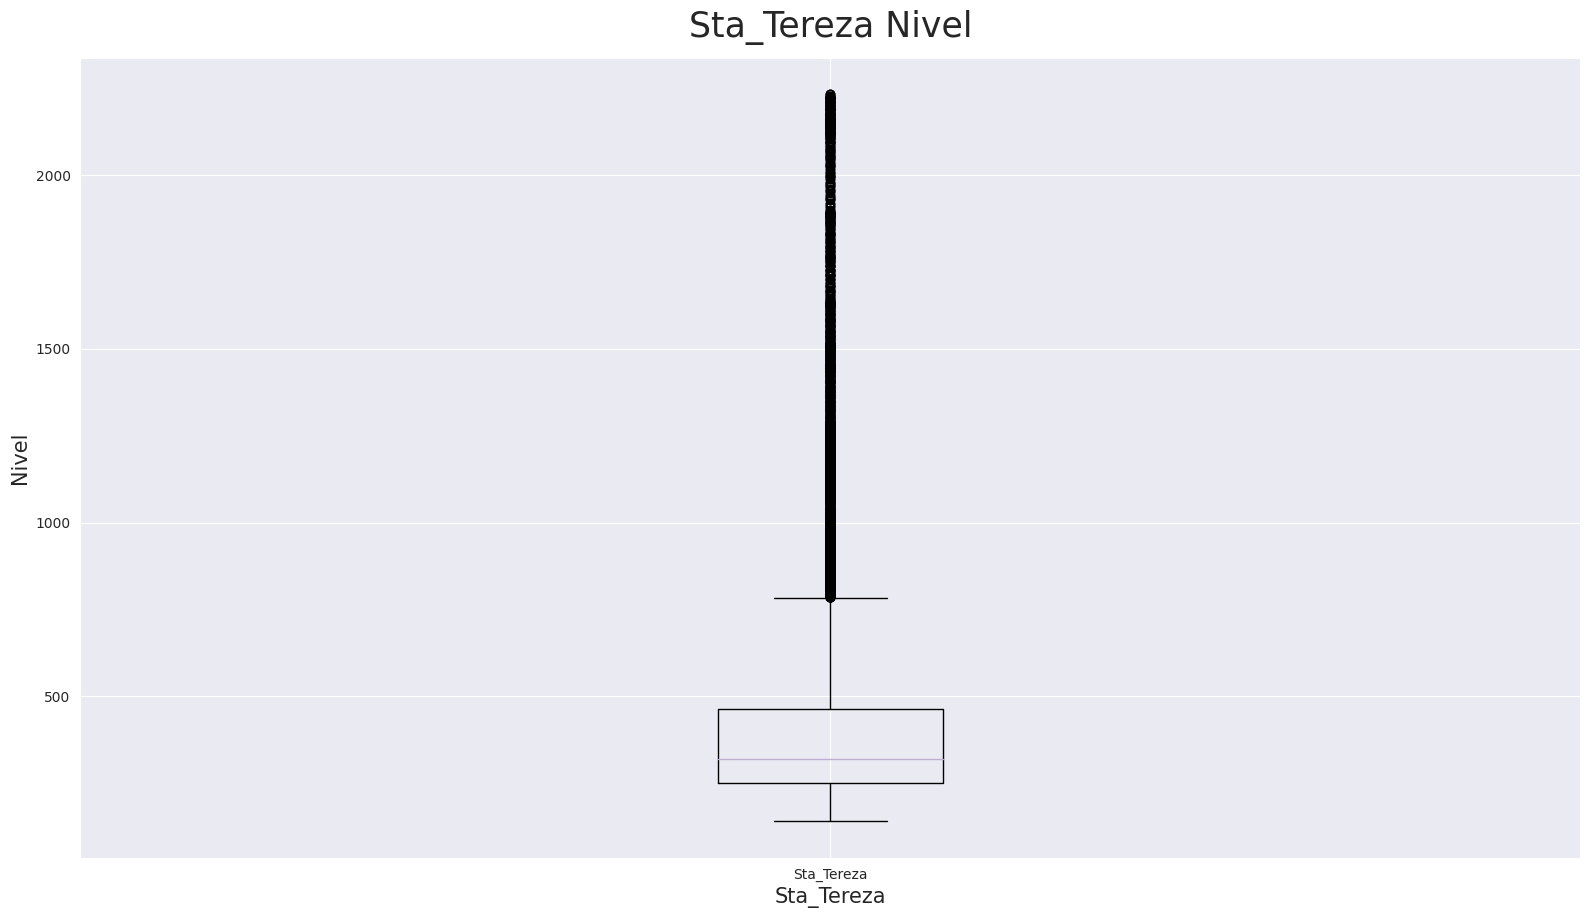

In [175]:
plotar_matplot('Sta_Tereza Nivel', 'Sta_Tereza', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Sta_Tereza24, tipo='boxplot')

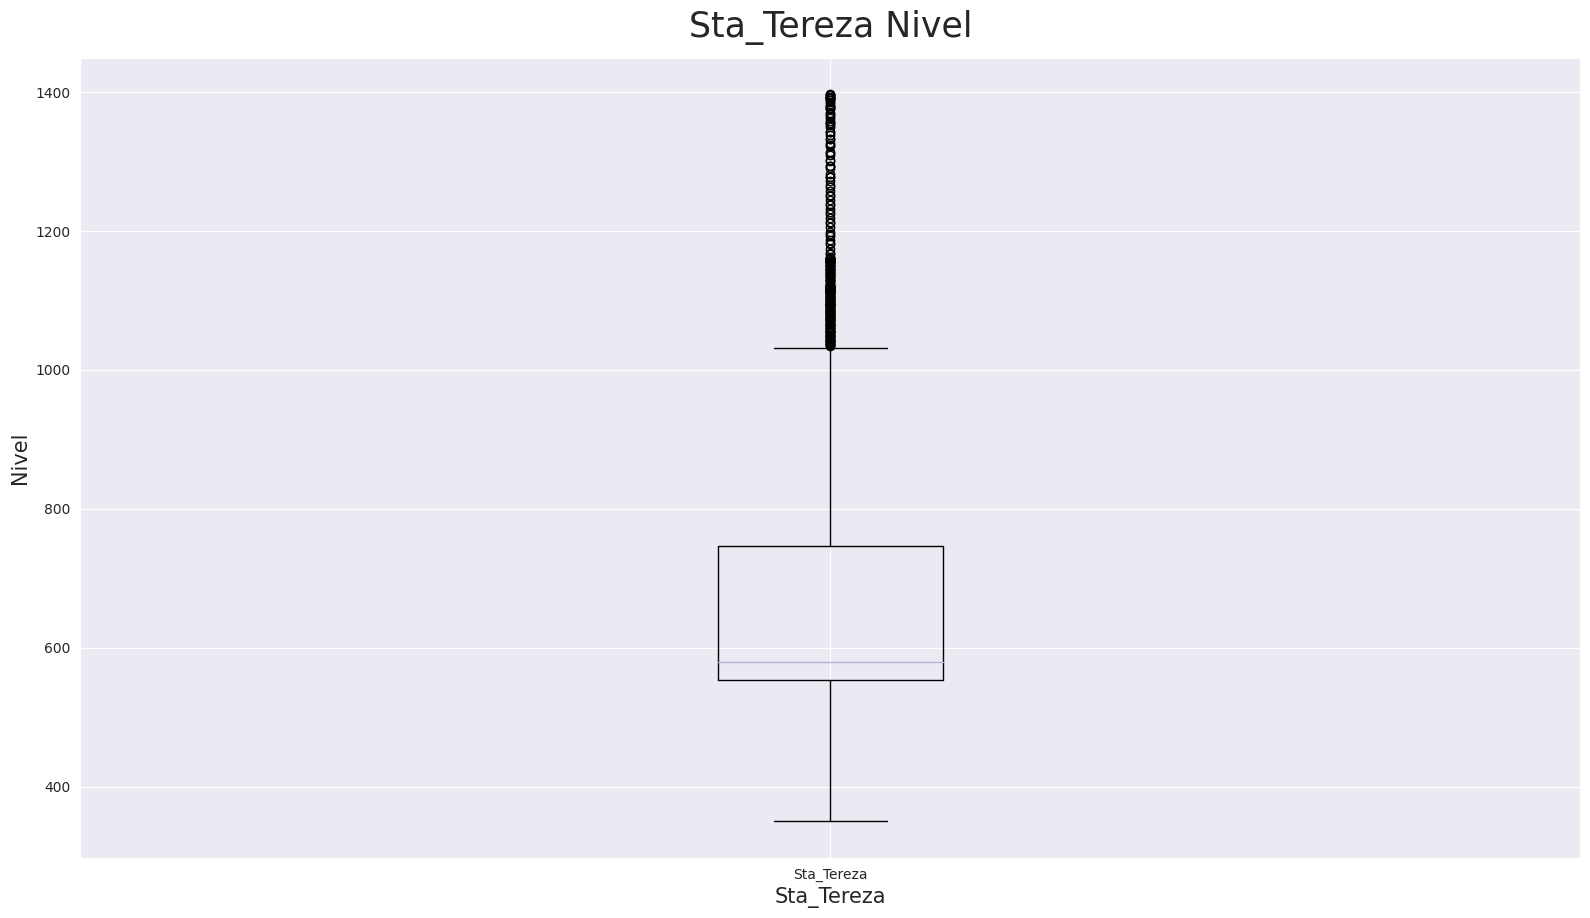

In [176]:
plotar_matplot('Sta_Tereza Nivel', 'Sta_Tereza', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Sta_Tereza23, tipo='boxplot')

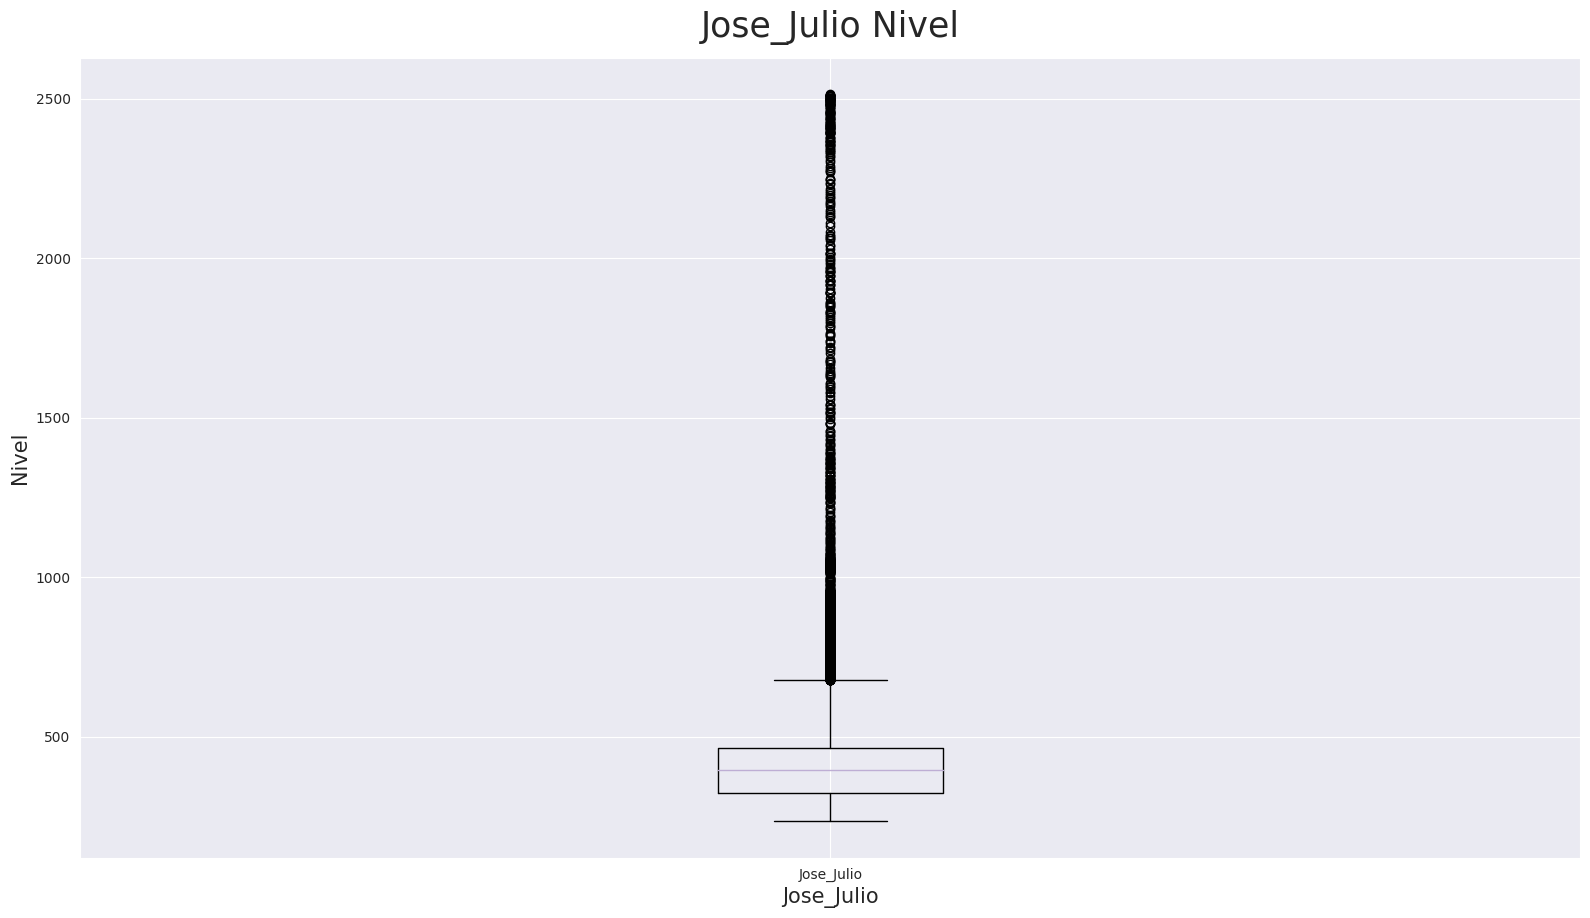

In [177]:
plotar_matplot('Jose_Julio Nivel', 'Jose_Julio', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Jose_Julio24, tipo='boxplot')

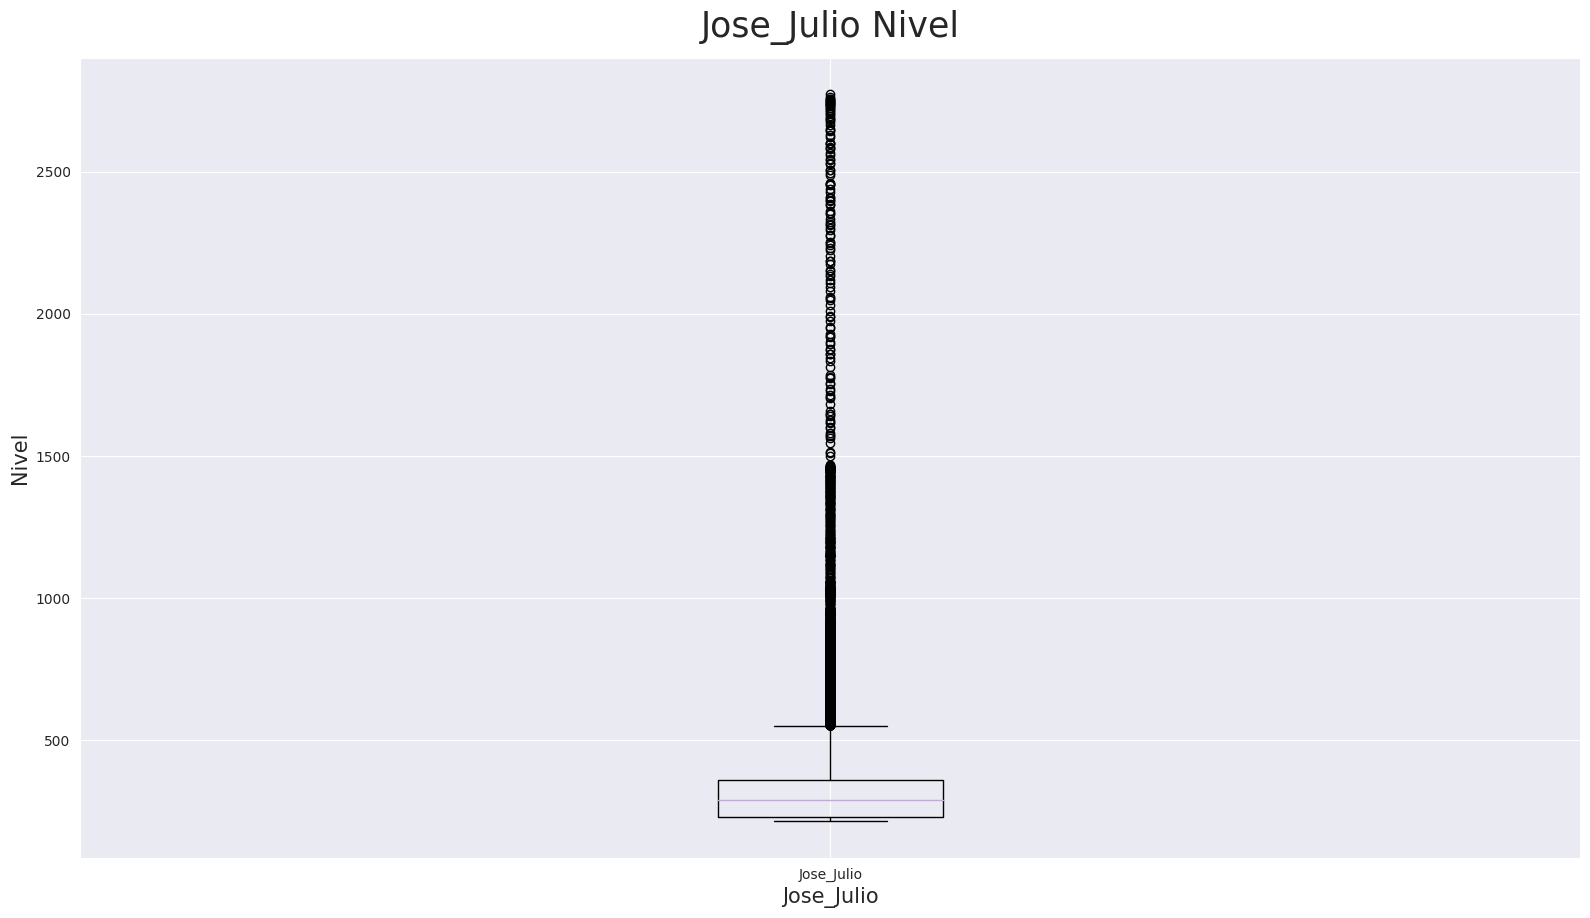

In [178]:
plotar_matplot('Jose_Julio Nivel', 'Jose_Julio', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Jose_Julio23, tipo='boxplot')

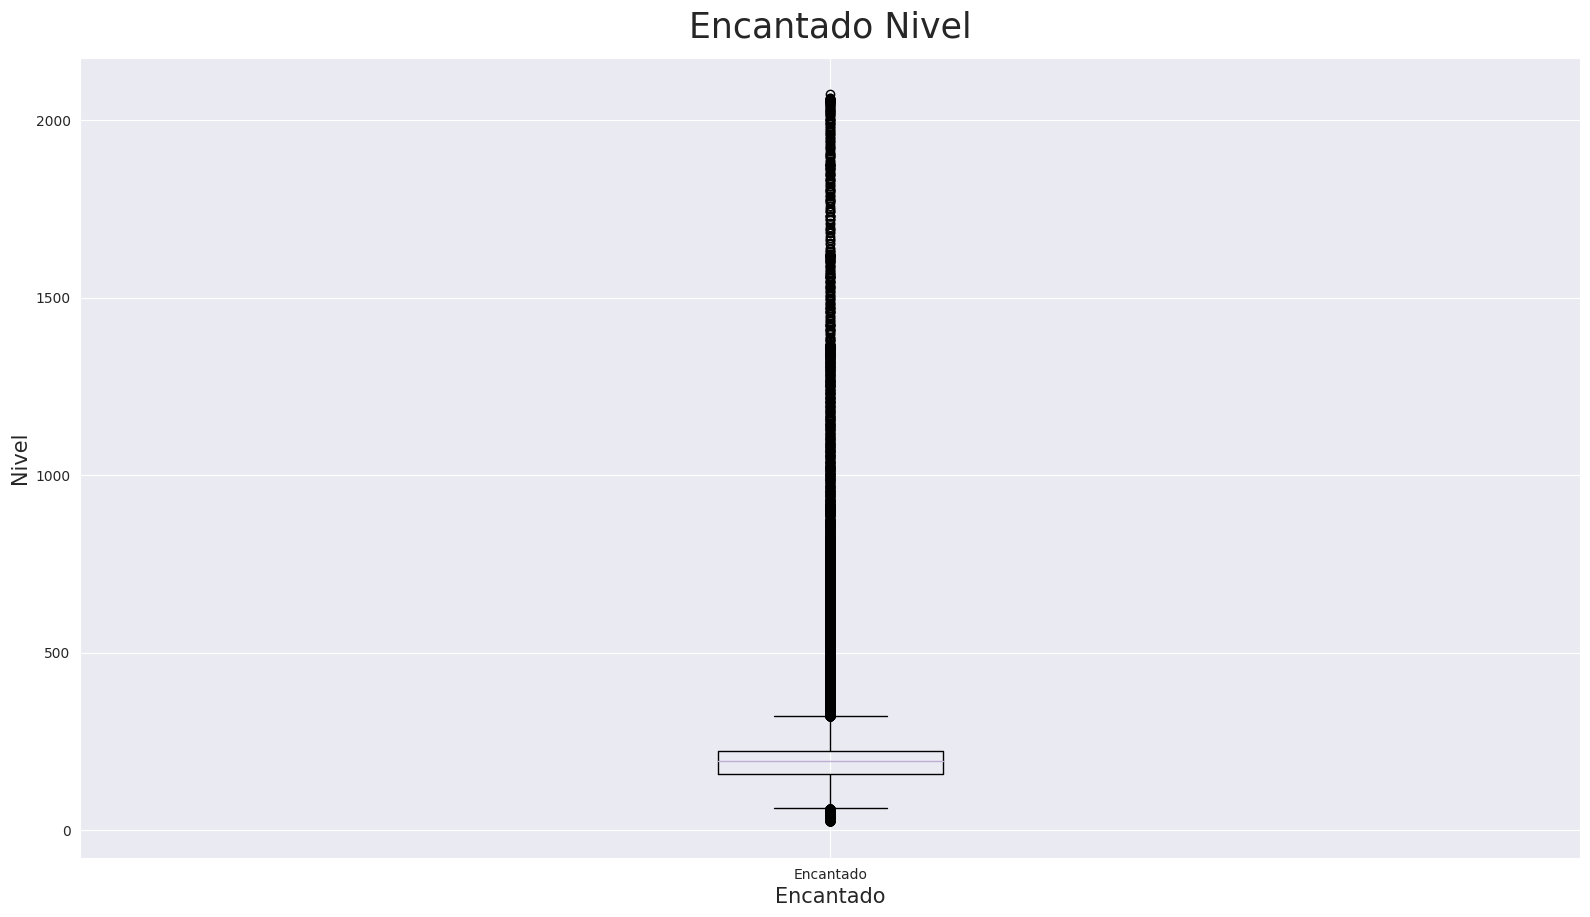

In [180]:
plotar_matplot('Encantado Nivel', 'Encantado', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado_unico, tipo='boxplot')

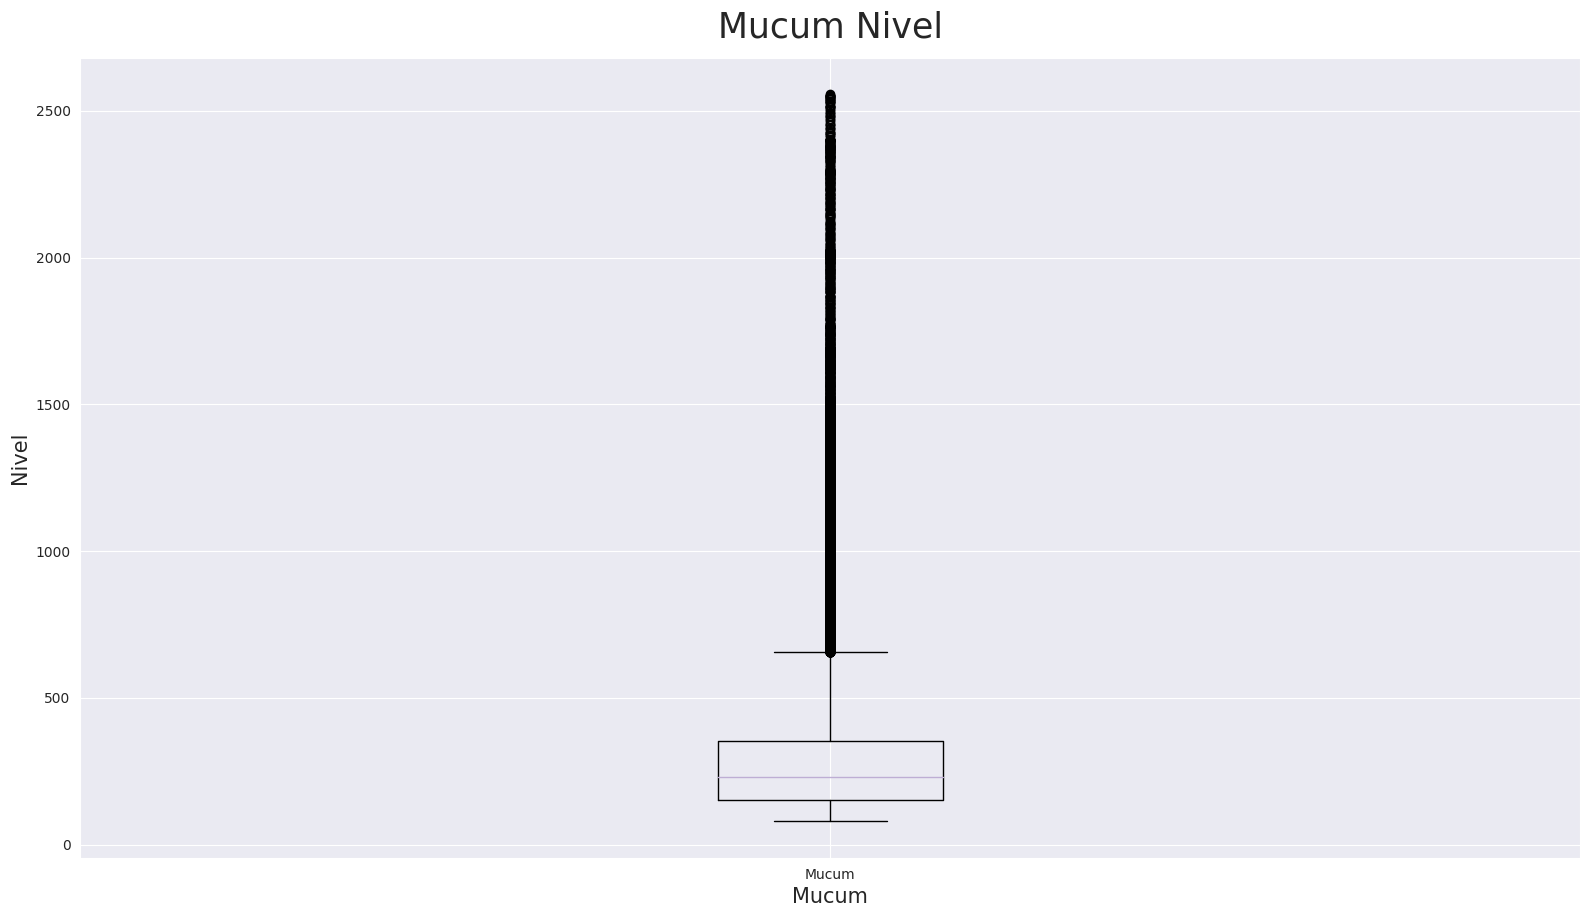

In [181]:
plotar_matplot('Mucum Nivel', 'Mucum', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Mucum_unico, tipo='boxplot')

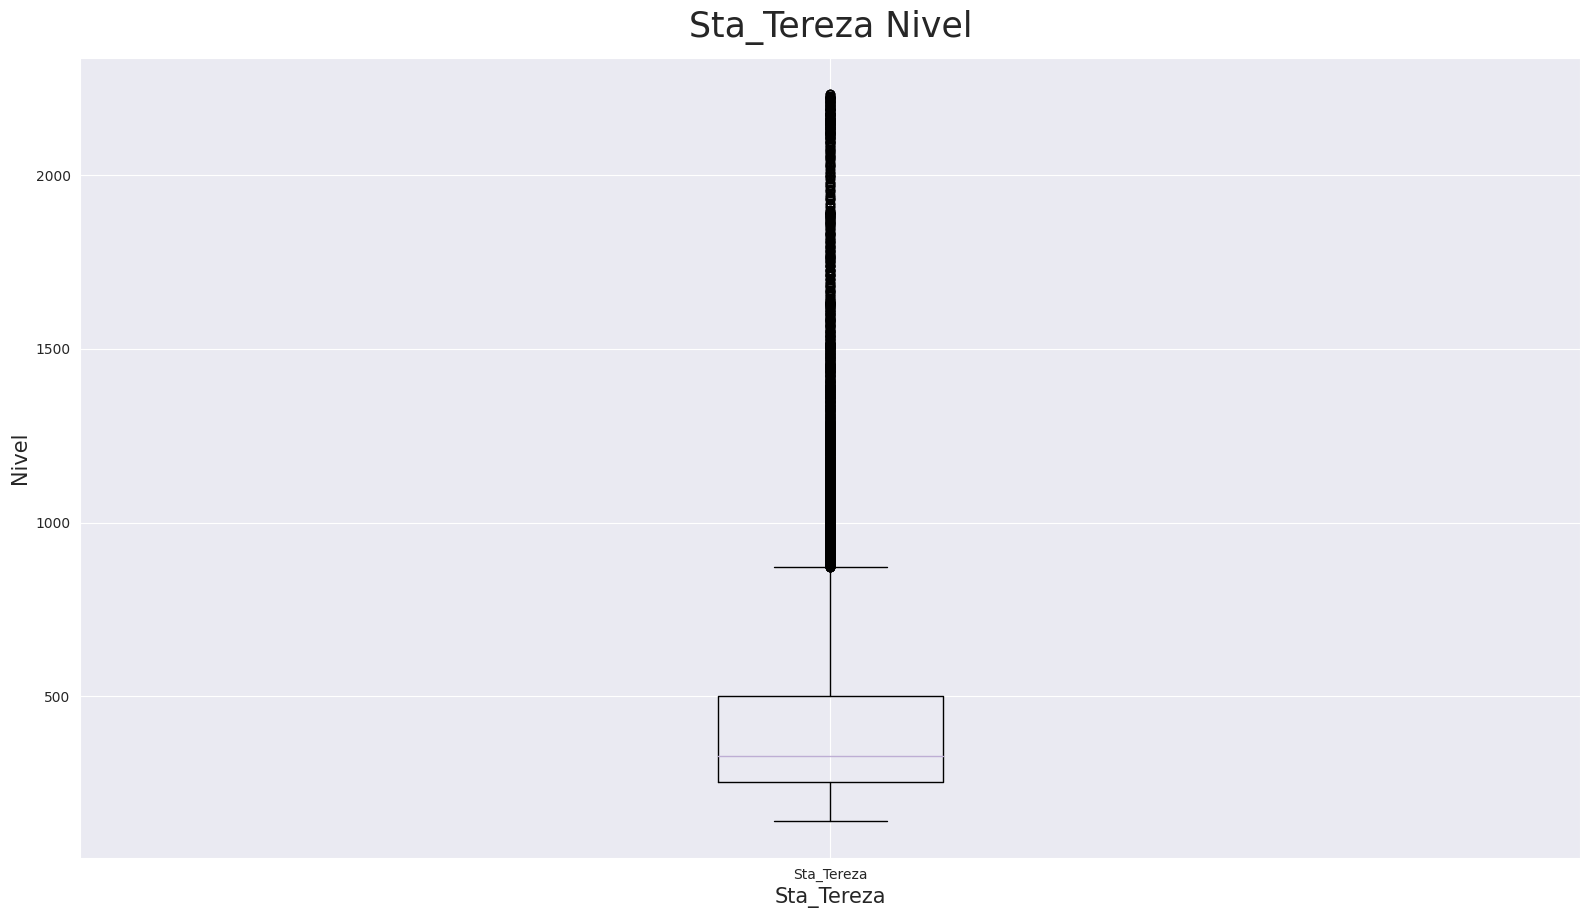

In [182]:
plotar_matplot('Sta_Tereza Nivel', 'Sta_Tereza', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Sta_Tereza_unico, tipo='boxplot')

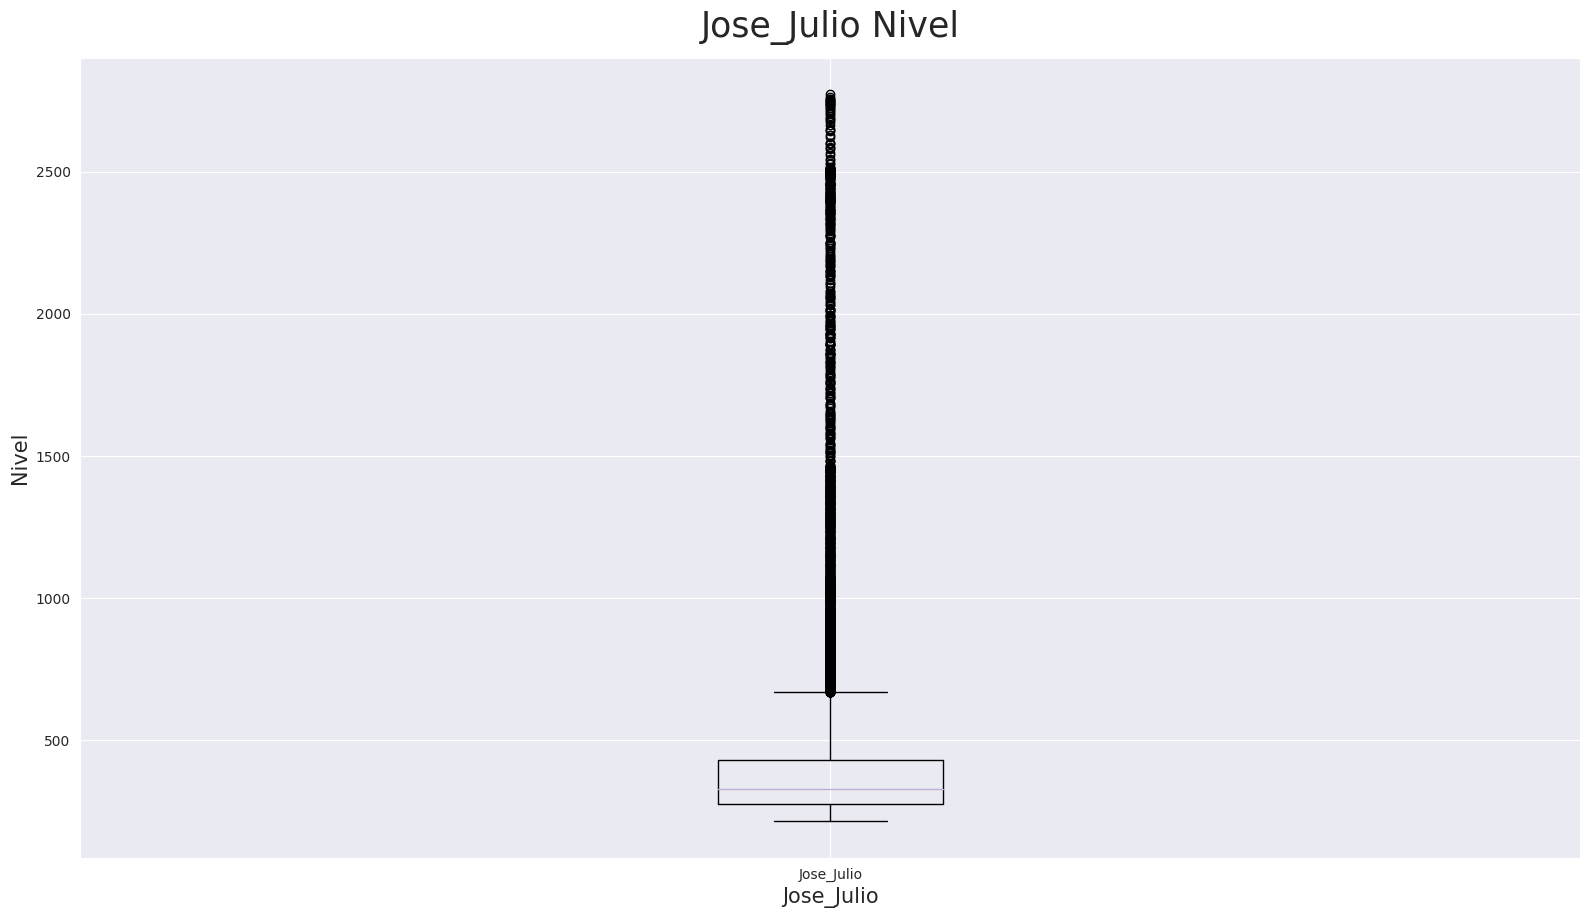

In [183]:
plotar_matplot('Jose_Julio Nivel', 'Jose_Julio', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Jose_Julio_unico, tipo='boxplot')

# Plot com seleção de intervalo

In [107]:
def plotar_matplot4(titulo, labelx, labely, x, y, dataset1, label1, intervalo_data=None):

  fig = plt.figure(figsize=(15, 8))
  eixo = fig.add_axes([0, 0, 1, 1])

  # Filtrar o intervalo de datas, se fornecido
  if intervalo_data is not None:
      data_inicio, data_fim = intervalo_data
      dataset1 = dataset1[(dataset1[x] >= data_inicio) & (dataset1[x] <= data_fim)]

  # Plotar os dados com os labels fornecidos
  eixo.plot(x, y, data=dataset1, label=label1, linestyle='-')

  # Configurar título e rótulos dos eixos
  eixo.set_title(titulo, fontsize=25, pad=15)
  eixo.set_xlabel(labelx, fontsize=15)
  eixo.set_ylabel(labely, fontsize=15)

  # Adicionar a legenda
  eixo.legend()
  eixo = eixo

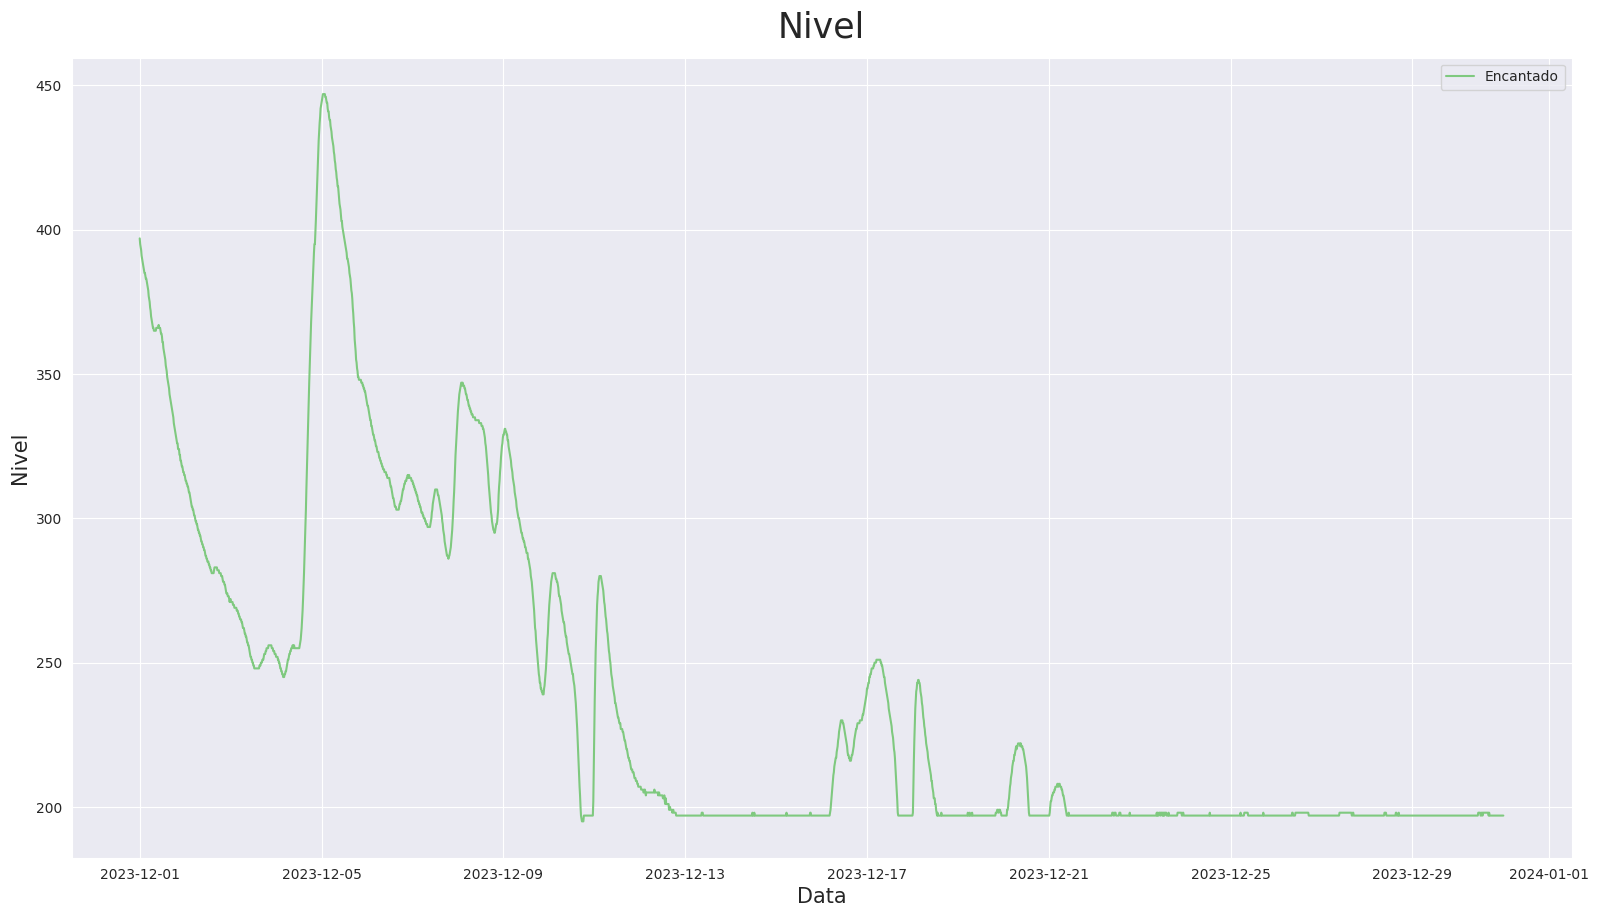

In [108]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-12-01')
data_fim = pd.to_datetime('2023-12-31')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico,
                'Encantado',
                intervalo_data=(data_inicio, data_fim))

# 4 Graficos em um plot com seleção de intervalo

In [126]:
def plotar_matplot4(titulo, labelx, labely, x, y, dataset1, dataset2, dataset3, dataset4, label1, label2, label3, label4, intervalo_data=None):

  fig = plt.figure(figsize=(15, 8))
  eixo = fig.add_axes([0, 0, 1, 1])

  # Filtrar o intervalo de datas, se fornecido
  if intervalo_data is not None:
      data_inicio, data_fim = intervalo_data
      dataset1 = dataset1[(dataset1[x] >= data_inicio) & (dataset1[x] <= data_fim)]
      dataset2 = dataset2[(dataset2[x] >= data_inicio) & (dataset2[x] <= data_fim)]
      dataset3 = dataset3[(dataset3[x] >= data_inicio) & (dataset3[x] <= data_fim)]
      dataset4 = dataset4[(dataset4[x] >= data_inicio) & (dataset4[x] <= data_fim)]

  # Plotar os dados com os labels fornecidos
  eixo.plot(x, y, data=dataset1, label=label1, linestyle='-')
  eixo.plot(x, y, data=dataset2, label=label2, linestyle='-')
  eixo.plot(x, y, data=dataset3, label=label3, linestyle='-')
  eixo.plot(x, y, data=dataset4, label=label4, linestyle='-')

  # Configurar título e rótulos dos eixos
  eixo.set_title(titulo, fontsize=25, pad=15)
  eixo.set_xlabel(labelx, fontsize=15)
  eixo.set_ylabel(labely, fontsize=15)

  # Adicionar a legenda
  eixo.legend()
  eixo = eixo

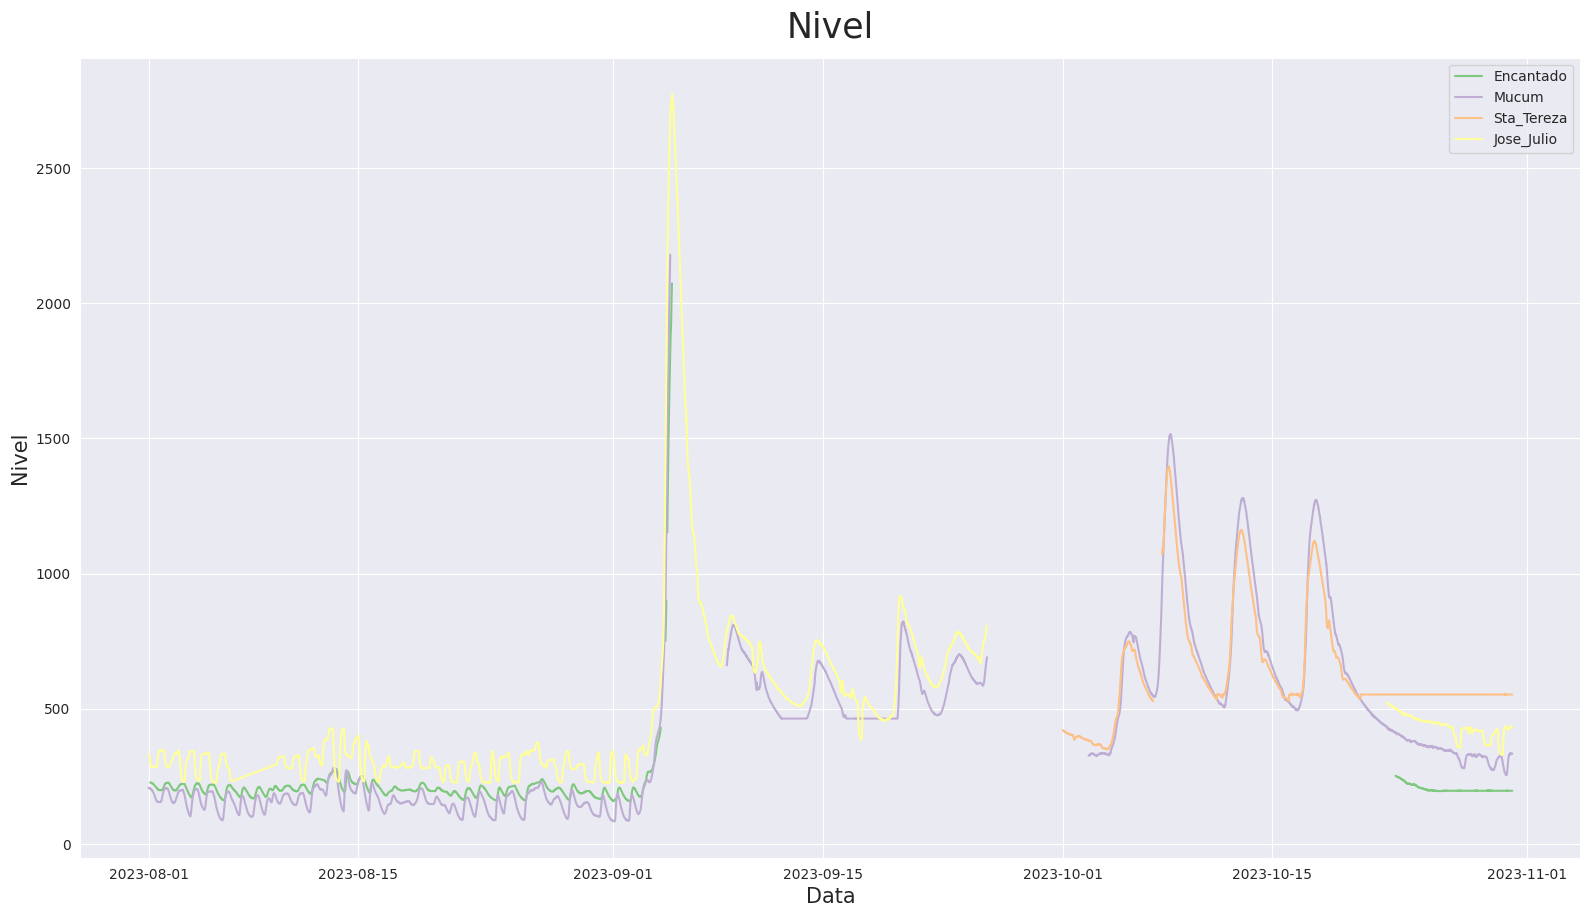

In [127]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-8-01')
data_fim = pd.to_datetime('2023-10-31')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

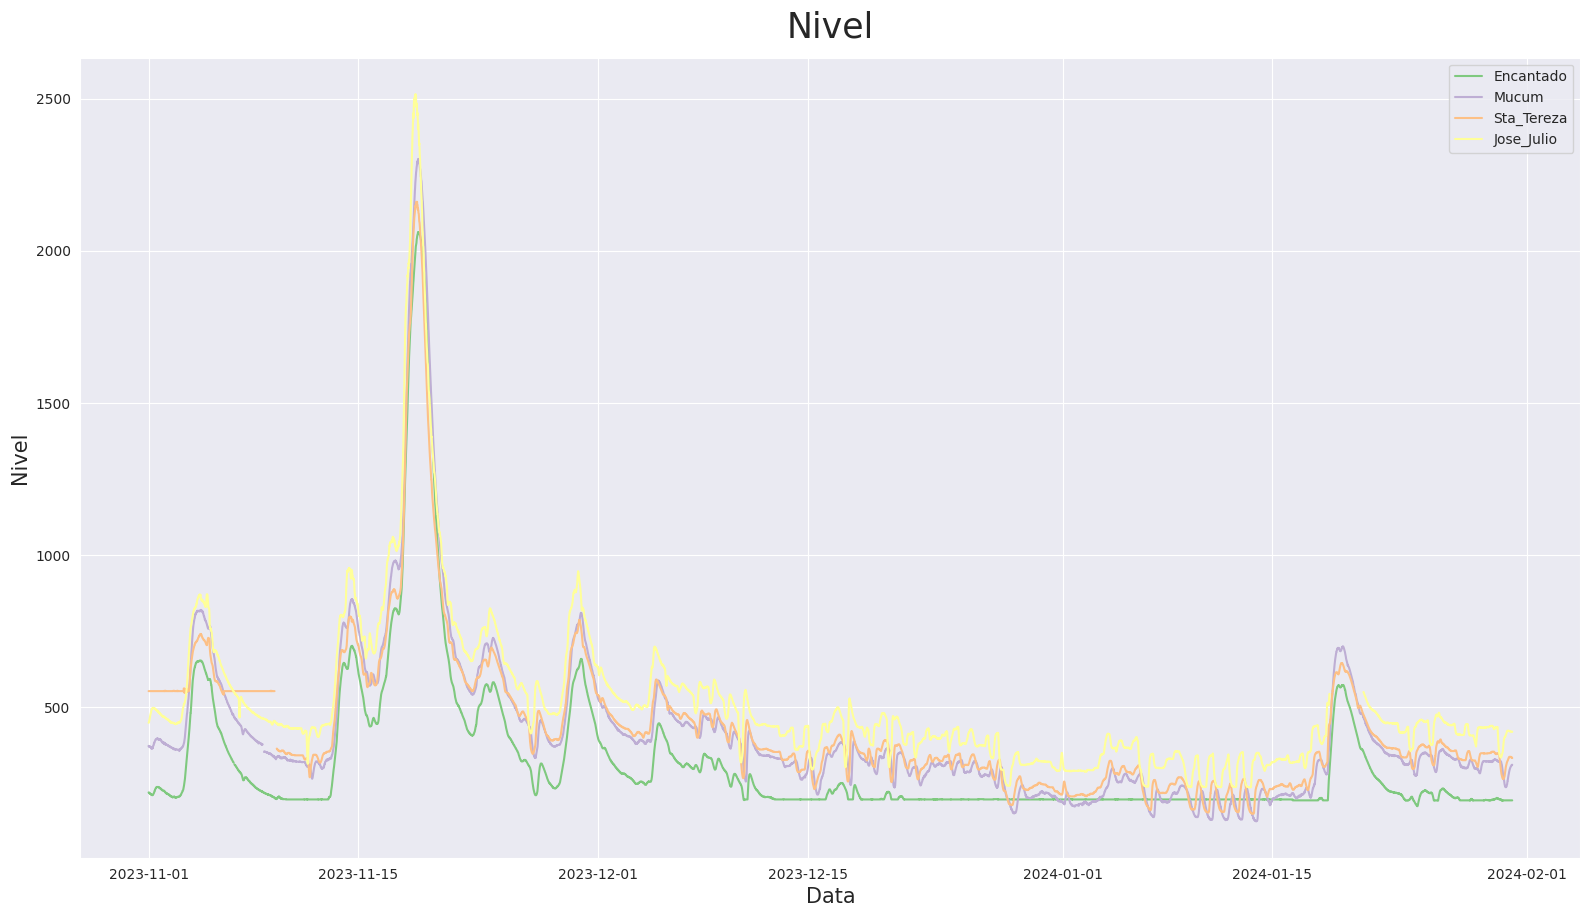

In [111]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-1-31')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

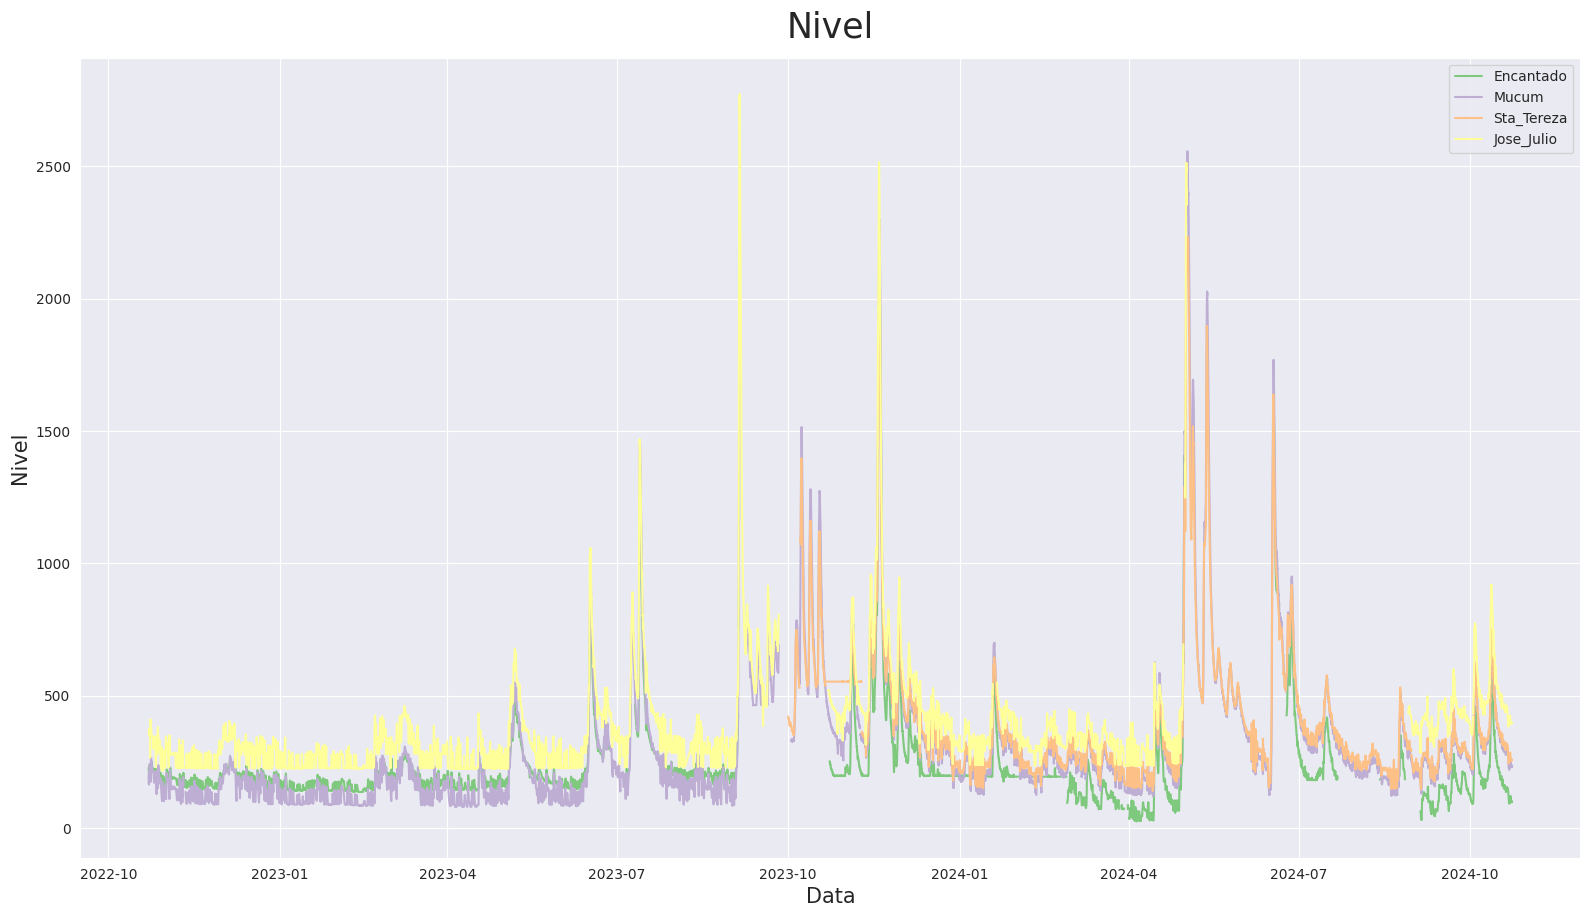

In [112]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-7-01')
data_fim = pd.to_datetime('2024-12-31')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

## Teste

In [187]:
def plotar_boxplot4(titulo, labelx, labely, x, y, dataset1, dataset2, dataset3, dataset4, label1, label2, label3, label4, intervalo_data=None):
  fig = plt.figure(figsize=(15, 8))
  eixo = fig.add_axes([0, 0, 1, 1])

  # Filtrar o intervalo de datas, se fornecido
  if intervalo_data is not None:
      data_inicio, data_fim = intervalo_data
      dataset1 = dataset1[(dataset1[x] >= data_inicio) & (dataset1[x] <= data_fim)]
      dataset2 = dataset2[(dataset2[x] >= data_inicio) & (dataset2[x] <= data_fim)]
      dataset3 = dataset3[(dataset3[x] >= data_inicio) & (dataset3[x] <= data_fim)]
      dataset4 = dataset4[(dataset4[x] >= data_inicio) & (dataset4[x] <= data_fim)]

  # Criar uma lista com os dados para o boxplot, ignorando dados nulos
  dados_boxplot = [
      dataset1[y].dropna().values,
      dataset2[y].dropna().values,
      dataset3[y].dropna().values,
      dataset4[y].dropna().values
  ]

  # Plotar o boxplot
  eixo.boxplot(dados_boxplot, labels=[label1, label2, label3, label4])

  # Configurar título e rótulos dos eixos
  eixo.set_title(titulo, fontsize=25, pad=15)
  eixo.set_xlabel(labelx, fontsize=15)
  eixo.set_ylabel(labely, fontsize=15)

  # Adicionar a legenda
  eixo.legend()
  eixo = eixo


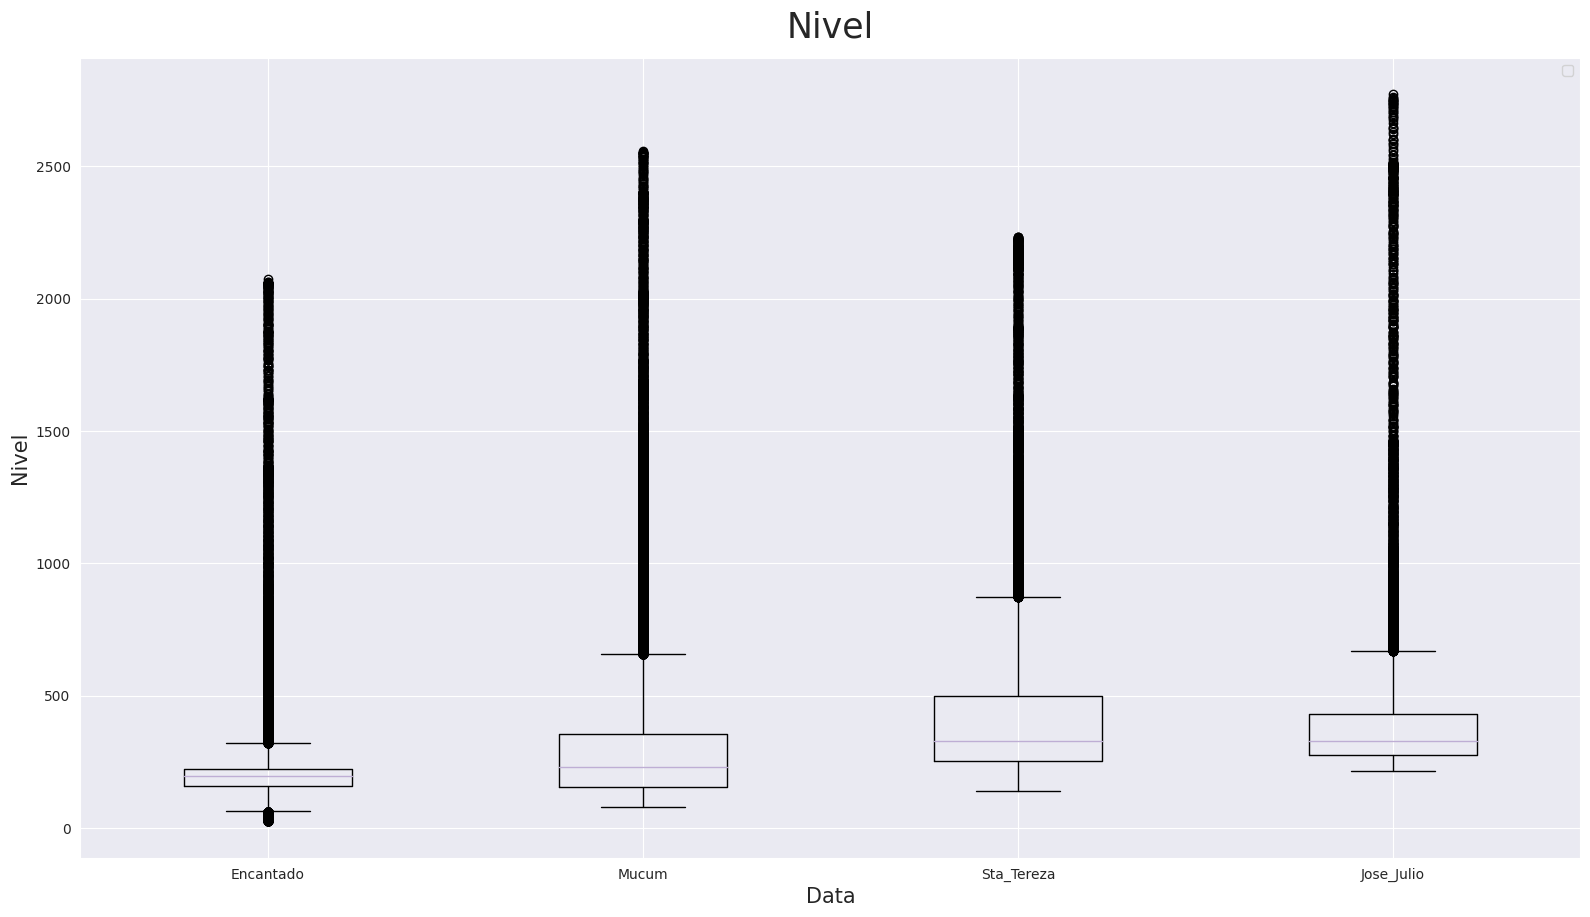

In [189]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-8-01')
data_fim = pd.to_datetime('2024-10-31')

# Chamando a função com intervalo de data
plotar_boxplot4('Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio', intervalo_data=(data_inicio, data_fim))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Criar dados de exemplo
x = np.linspace(0, 10, 100)
y = np.sin(x) + 0.5 * np.random.normal(size=x.shape)

# Encontrar os picos
picos = (y[1:-1] > y[:-2]) & (y[1:-1] > y[2:])
x_picos = x[1:-1][picos]
y_picos = y[1:-1][picos]

# Criar o gráfico
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Sinal com ruído')
plt.scatter(x_picos, y_picos, color='red', label='Picos')

# Anotar os picos
for (x_peak, y_peak) in zip(x_picos, y_picos):
    plt.annotate(f'{y_peak:.2f}', xy=(x_peak, y_peak), xytext=(5, 5),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->'))

plt.title('Gráfico com Picos Anotados')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend()
plt.grid()
plt.show()

#Plotar Grafico usando SNS

In [ ]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(16,9)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

In [ ]:
plotar('Encantado Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado24)

In [ ]:
plotar('Encantado Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado_unico)

In [ ]:
df_Encantado_unico.info()